## Import

In [14]:
%load_ext autoreload
%autoreload 2

import torch
import shutil
import os
import pickle
import matplotlib.pyplot as plt
# from config import config

import utils
import training
import testing
import model as md
import dataset as ds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Config

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

code_names = ['code_1', 'code_2', 'code_3', 'code_4', 'code_mix']
train_code = code_names[4]
dir_name = 'BCE_lr0001_fm150_ep300_dp01_1000_100'
result_dir, config = utils.create_rec_dir(dir_name)


train_range = range(2,8)
# train_range = [2]
test_range = range(1,11)
# test_range = [1,2,3,4,5,6,7]

In [16]:
print(f"Decoder Epochs: {config['decoder']['epochs']}")
print(f"Batch Size: {config['decoder']['batch_size']}")
print(f"Learning Rate: {config['decoder']['learning_rate']}")
print(f"Loss Function: {config['decoder']['loss_func']}")
print(f"Feature Maps: {config['decoder']['output_channels']}")
print(f"Dropout: {config['decoder']['dropout']}")
print(f"layer_1: {config['decoder']['layer_1']}")
print(f"layer_2: {config['decoder']['layer_2']}")

print(f"Classifier Epochs: {config['classifier']['epochs']}")
print(f"layer_1: {config['classifier']['layer_1']}")
print(f"layer_2: {config['classifier']['layer_2']}")

Decoder Epochs: 300
Batch Size: 1000
Learning Rate: 0.001
Loss Function: BCE
Feature Maps: 150
Dropout: 0.1
layer_1: 1000
layer_2: 100
Classifier Epochs: 100
layer_1: 1000
layer_2: 100


## Train Decoder

### Train CNN

In [4]:
# for SNR_model in train_range:
#     print(f"Train CNN Model with SNR = {SNR_model} dB")
#     training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=0)

### Train CNN_1000_500_12

In [32]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=3)

Train CNN Model with SNR = 2 dB
Epoch 1 , BER: 0.35535916686058044
Epoch 2 , BER: 0.24887582659721375
Epoch 3 , BER: 0.19669249653816223
Epoch 4 , BER: 0.17258666455745697
Epoch 5 , BER: 0.15715333819389343
Epoch 6 , BER: 0.14469332993030548
Epoch 7 , BER: 0.1356816589832306
Epoch 8 , BER: 0.1274966597557068
Epoch 9 , BER: 0.12147166579961777
Epoch 10 , BER: 0.11412583291530609
Epoch 11 , BER: 0.10742250084877014
Epoch 12 , BER: 0.10117500275373459
Epoch 13 , BER: 0.09536916762590408
Epoch 14 , BER: 0.0908866673707962
Epoch 15 , BER: 0.0867033302783966
Epoch 16 , BER: 0.08254166692495346
Epoch 17 , BER: 0.07859083265066147
Epoch 18 , BER: 0.07555833458900452
Epoch 19 , BER: 0.0724116638302803
Epoch 20 , BER: 0.07002166658639908
Epoch 21 , BER: 0.06824583560228348
Epoch 22 , BER: 0.06618999689817429
Epoch 23 , BER: 0.06450249999761581
Epoch 24 , BER: 0.062780000269413
Epoch 25 , BER: 0.06195833161473274
Epoch 26 , BER: 0.060462500900030136
Epoch 27 , BER: 0.05881999805569649
Epoch 28 , 

### Train CCNN_AL

In [6]:
# for SNR_model in train_range:
#     print(f"Train CCNN_AL Model with SNR = {SNR_model} dB")
#     training.train_model(device, config, result_dir, code_name=code_name, SNR=SNR_model, model_idx=1)

### Train CCNN_AL_1000_500_12

In [17]:
for SNR_model in train_range:
    print(f"Train CCNN_AL_1000_500_12 Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=5)

Train CCNN_AL_1000_500_12 Model with SNR = 2 dB
Epoch 1 , BER: 0.33891749382019043
Epoch 2 , BER: 0.20372416079044342
Epoch 3 , BER: 0.16130416095256805
Epoch 4 , BER: 0.13430416584014893
Epoch 5 , BER: 0.1211533322930336
Epoch 6 , BER: 0.1136983335018158
Epoch 7 , BER: 0.10911499708890915
Epoch 8 , BER: 0.10563666373491287
Epoch 9 , BER: 0.10120083391666412
Epoch 10 , BER: 0.09476999938488007
Epoch 11 , BER: 0.08682083338499069
Epoch 12 , BER: 0.07877833396196365
Epoch 13 , BER: 0.06941249966621399
Epoch 14 , BER: 0.06154583394527435
Epoch 15 , BER: 0.05433333292603493
Epoch 16 , BER: 0.04912416636943817
Epoch 17 , BER: 0.046502500772476196
Epoch 18 , BER: 0.044247500598430634
Epoch 19 , BER: 0.042971666902303696
Epoch 20 , BER: 0.04207250103354454
Epoch 21 , BER: 0.04103083163499832
Epoch 22 , BER: 0.040334999561309814
Epoch 23 , BER: 0.03943416476249695
Epoch 24 , BER: 0.03842666745185852
Epoch 25 , BER: 0.03791416808962822
Epoch 26 , BER: 0.03677000105381012
Epoch 27 , BER: 0.03564

### Train CCNN_FM

In [8]:
# for SNR_model in train_range:
#     print(f"Train CCNN_FM Model with SNR = {SNR_model} dB")
#     training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=2)

### Train CCNN_FM_1000_500_12

In [5]:
for SNR_model in train_range:
    print(f"Train CCNN_FM Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=6)

Train CCNN_FM Model with SNR = 2 dB
Epoch 1 , BER: 0.34429582953453064
Epoch 2 , BER: 0.21698667109012604
Epoch 3 , BER: 0.17168666422367096
Epoch 4 , BER: 0.14429916441440582
Epoch 5 , BER: 0.12541666626930237
Epoch 6 , BER: 0.11421500146389008
Epoch 7 , BER: 0.10860499739646912
Epoch 8 , BER: 0.10368166863918304
Epoch 9 , BER: 0.09675833582878113
Epoch 10 , BER: 0.08747082948684692
Epoch 11 , BER: 0.08049583435058594
Epoch 12 , BER: 0.07605250179767609
Epoch 13 , BER: 0.07193583250045776
Epoch 14 , BER: 0.06427083164453506
Epoch 15 , BER: 0.05546249821782112
Epoch 16 , BER: 0.05051666498184204
Epoch 17 , BER: 0.04676499962806702
Epoch 18 , BER: 0.04439166560769081
Epoch 19 , BER: 0.04312083497643471


Epoch 20 , BER: 0.04234916716814041
Epoch 21 , BER: 0.04133666679263115
Epoch 22 , BER: 0.040472500026226044
Epoch 23 , BER: 0.039494168013334274
Epoch 24 , BER: 0.03852583467960358
Epoch 25 , BER: 0.03765999898314476
Epoch 26 , BER: 0.03683749958872795
Epoch 27 , BER: 0.03609583154320717
Epoch 28 , BER: 0.03535500168800354
Epoch 29 , BER: 0.03442833200097084
Epoch 30 , BER: 0.033574167639017105
Epoch 31 , BER: 0.032364167273044586
Epoch 32 , BER: 0.0313199982047081
Epoch 33 , BER: 0.0297758337110281
Epoch 34 , BER: 0.02785666659474373
Epoch 35 , BER: 0.025894999504089355
Epoch 36 , BER: 0.02388666570186615
Epoch 37 , BER: 0.02170083299279213
Epoch 38 , BER: 0.01917250081896782
Epoch 39 , BER: 0.01763249933719635
Epoch 40 , BER: 0.016274167224764824
Epoch 41 , BER: 0.014950833283364773
Epoch 42 , BER: 0.013838333077728748
Epoch 43 , BER: 0.013088333420455456
Epoch 44 , BER: 0.012142499908804893
Epoch 45 , BER: 0.011481666937470436
Epoch 46 , BER: 0.01078666653484106
Epoch 47 , BER: 0.0

## Test Decoder

### Test CNN

In [10]:
# for code_name in code_names:
#     for SNR_model in train_range:
#         BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=0, SNR_model=SNR_model, test_range=test_range)

In [33]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=3, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.0320724994
SNR: 2 dB, BER: 0.0160358325
SNR: 3 dB, BER: 0.0069283335
SNR: 4 dB, BER: 0.0029800001


SNR: 5 dB, BER: 0.0014191667
SNR: 6 dB, BER: 0.0010425
SNR: 7 dB, BER: 0.000955
SNR: 8 dB, BER: 0.0010058334
SNR: 9 dB, BER: 0.0009633334
SNR: 10 dB, BER: 0.0009541666
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CNN_code_1_2dB.pkl
SNR: 1 dB, BER: 0.0332108326
SNR: 2 dB, BER: 0.0167016666
SNR: 3 dB, BER: 0.0071358331
SNR: 4 dB, BER: 0.0028425001
SNR: 5 dB, BER: 0.0011883334
SNR: 6 dB, BER: 0.0008083333
SNR: 7 dB, BER: 0.000695
SNR: 8 dB, BER: 0.0007216667
SNR: 9 dB, BER: 0.0007566666
SNR: 10 dB, BER: 0.0006858333
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CNN_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0369899981
SNR: 2 dB, BER: 0.0187775008
SNR: 3 dB, BER: 0.0080399998
SNR: 4 dB, BER: 0.0032783332
SNR: 5 dB, BER: 0.0013275
SNR: 6 dB, BER: 0.0009516667
SNR: 7 dB, BER: 0.0008058333
SNR: 8 dB, BER: 0.0008616667
SNR: 9 dB, BER: 0.0008341667
SNR: 10 dB, BER: 0.0007475
/home/jxyang/pro

### Test CCNN_AL

In [ ]:
# for SNR_model in train_range:
#     BERs = testing.test_model(device, result_dir, code_name=code_name, model_idx=1, SNR_model=SNR_model, test_range=test_range)

### Test CCNN_FM

In [ ]:
# for code_name in code_names:
#     for SNR_model in train_range:
#         BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=2, SNR_model=SNR_model, test_range=test_range)

In [7]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=6, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.0080666663
SNR: 2 dB, BER: 0.0036599999
SNR: 3 dB, BER: 0.0013725
SNR: 4 dB, BER: 0.000405
SNR: 5 dB, BER: 8.41667e-05
SNR: 6 dB, BER: 2.5e-05
SNR: 7 dB, BER: 4.1667e-06
SNR: 8 dB, BER: 0.0
SNR: 9 dB, BER: 0.0
SNR: 10 dB, BER: 0.0
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CCNN_FM_code_1_2dB.pkl
SNR: 1 dB, BER: 0.0112133333
SNR: 2 dB, BER: 0.0052683335
SNR: 3 dB, BER: 0.0020391666
SNR: 4 dB, BER: 0.0006325
SNR: 5 dB, BER: 0.0001366667
SNR: 6 dB, BER: 3.83333e-05
SNR: 7 dB, BER: 3.3333e-06
SNR: 8 dB, BER: 0.0
SNR: 9 dB, BER: 0.0
SNR: 10 dB, BER: 0.0
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CCNN_FM_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0154883331
SNR: 2 dB, BER: 0.0073925001
SNR: 3 dB, BER: 0.0028616667
SNR: 4 dB, BER: 0.0009608333
SNR: 5 dB, BER: 0.00022
SNR: 6 dB, BER: 3.83333e-05
SNR: 7 dB, BER: 5.8333e-06
SNR: 8 dB, BER: 0.0
SNR: 9 dB, BER: 0.0
SNR: 1

## Draw Result

#### Draw Loss

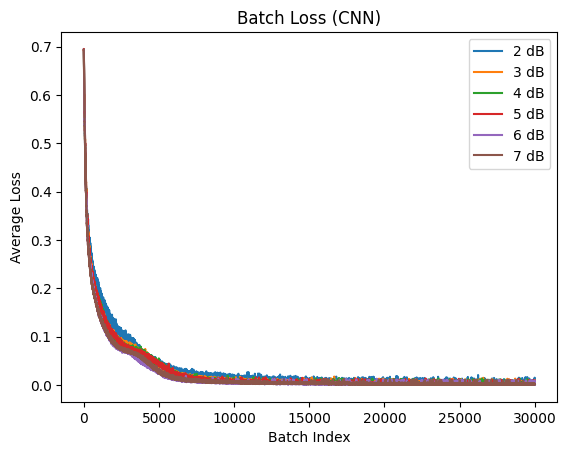

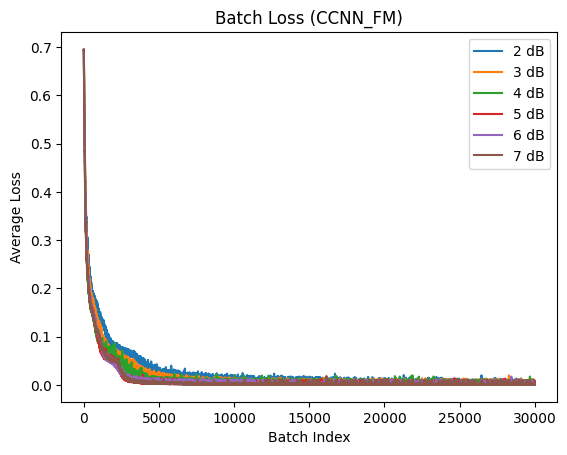

In [8]:
# utils.draw_loss(result_dir, model_idx=0, SNR_range=train_range)  # CNN_1000_12
# utils.draw_loss(result_dir, model_idx=1, SNR_range=train_range)  # CCNN_AL_1004_12
# utils.draw_loss(result_dir, model_idx=2, SNR_range=train_range)  # CCNN_FM_1000_12
utils.draw_loss(result_dir, model_idx=3, SNR_range=train_range)  # CNN_1000_500_12
# utils.draw_loss(result_dir, model_idx=4, SNR_range=train_range)  # CNN_1000_500_250_12
# utils.draw_loss(result_dir, model_idx=5, SNR_range=train_range)  # CCNN_AL_1000_500_12
utils.draw_loss(result_dir, model_idx=6, SNR_range=train_range)  # CCNN_FM_1000_500_12
# utils.draw_loss(result_dir, model_idx=7, SNR_range=train_range)  # CNN_1000_1000_12


#### Draw BER

In [42]:
BERs_uncoded = utils.load_BER_uncoded(train_code)
print(BERs_uncoded)

BERs_hard = utils.load_BER_hard(train_code)
print(BERs_hard)

[0.0565925, 0.037331666666666666, 0.022771666666666666, 0.012518333333333333, 0.005915, 0.0023575, 0.0007816666666666666, 0.00018583333333333334, 3.75e-05, 2.5e-06]
[8.21458333e-02 3.78541667e-02 1.47500000e-02 4.43750000e-03
 8.95833333e-04 8.33333333e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


##### Draw CNN

CNN 2dB: [0.0320724994, 0.0160358325, 0.0069283335, 0.0029800001, 0.0014191667, 0.0010425, 0.000955, 0.0010058334, 0.0009633334, 0.0009541666]
CNN 3dB: [0.0332108326, 0.0167016666, 0.0071358331, 0.0028425001, 0.0011883334, 0.0008083333, 0.000695, 0.0007216667, 0.0007566666, 0.0006858333]
CNN 4dB: [0.0369899981, 0.0187775008, 0.0080399998, 0.0032783332, 0.0013275, 0.0009516667, 0.0008058333, 0.0008616667, 0.0008341667, 0.0007475]
CNN 5dB: [0.0378658324, 0.0189800002, 0.0080583338, 0.0030733333, 0.001225, 0.000765, 0.0006058333, 0.0006525, 0.00065, 0.0006208333]
CNN 6dB: [0.0390000008, 0.0196375009, 0.0085049998, 0.003365, 0.0014191667, 0.0009591667, 0.0008591667, 0.0008775, 0.0008258334, 0.000815]
CNN 7dB: [0.0399558321, 0.0201158337, 0.0084325001, 0.0032016668, 0.0011725, 0.00065, 0.0005441667, 0.0006325, 0.0005525, 0.000535]


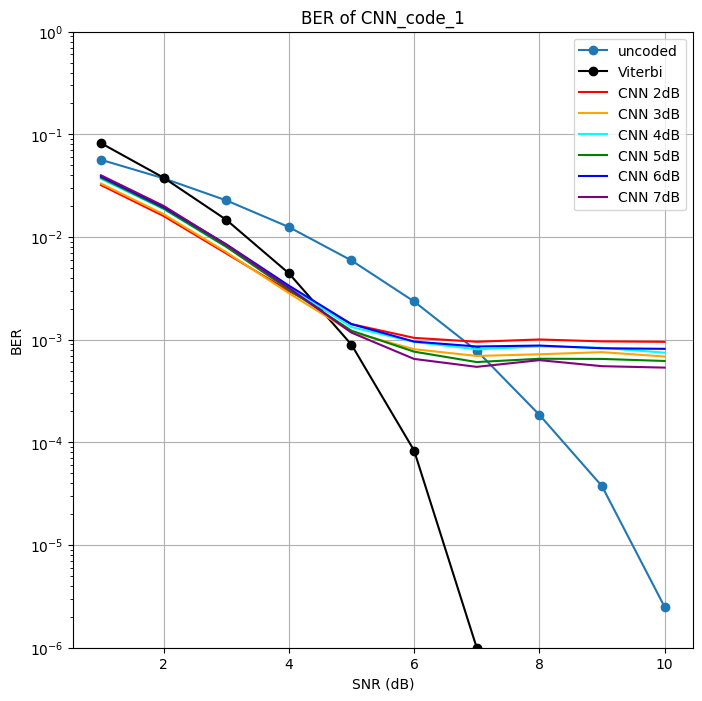

CNN 2dB: [0.0337449983, 0.0163258333, 0.0066908333, 0.002145, 0.0007058333, 0.0002491667, 0.0001591667, 0.0001566667, 0.0001191667, 0.0001541667]
CNN 3dB: [0.0378758349, 0.0183083341, 0.0073633334, 0.0022700001, 0.0006208333, 0.0001125, 3.41667e-05, 1.5e-05, 2e-05, 1.91667e-05]
CNN 4dB: [0.0418200009, 0.0203283336, 0.008310833, 0.0026216668, 0.0007041667, 0.0001491667, 5.66667e-05, 4.75e-05, 3.66667e-05, 4.83333e-05]
CNN 5dB: [0.0435324982, 0.0210941657, 0.00856, 0.0027125, 0.0007158333, 0.0001191667, 1.5e-05, 0.0, 0.0, 0.0]
CNN 6dB: [0.0455750003, 0.022156667, 0.0089974999, 0.0028658332, 0.0008108334, 0.0001908333, 7e-05, 6e-05, 6.75e-05, 6e-05]
CNN 7dB: [0.045940835, 0.0225249995, 0.0093266666, 0.0029716666, 0.0008508333, 0.000195, 9.41667e-05, 8.08333e-05, 7.66667e-05, 8.16667e-05]


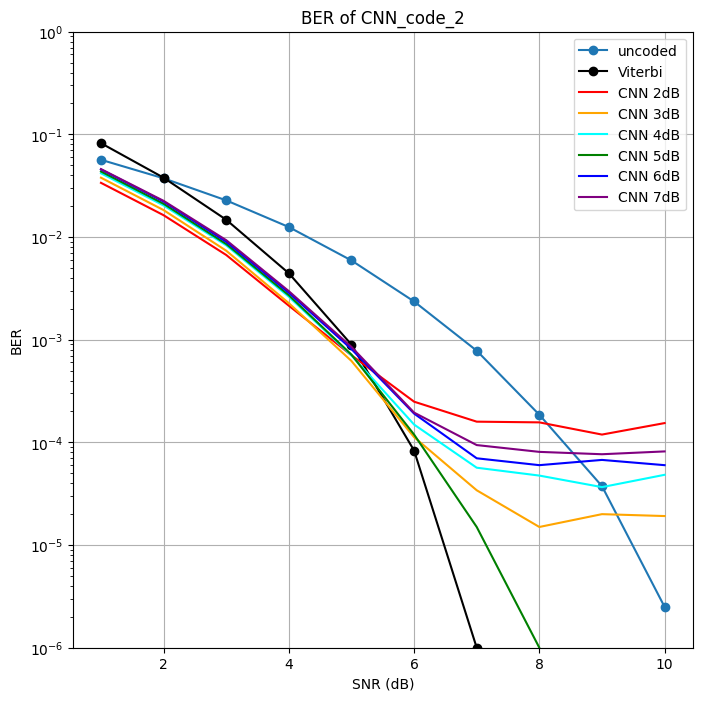

CNN 2dB: [0.034389168, 0.0173591673, 0.0073808334, 0.0029541666, 0.0013266667, 0.0009225, 0.0007683333, 0.0008, 0.0007883334, 0.00075]
CNN 3dB: [0.0363333337, 0.0181041658, 0.0076333331, 0.003055, 0.0012825, 0.000905, 0.0007341666, 0.0007991667, 0.0007158333, 0.0007458333]
CNN 4dB: [0.0404075012, 0.0201458335, 0.0085158329, 0.0031699999, 0.001235, 0.00074, 0.0005641667, 0.0006091667, 0.0006275, 0.00058]
CNN 5dB: [0.0399291664, 0.0200041663, 0.0084241666, 0.0032975001, 0.0012958334, 0.000865, 0.0007116667, 0.0007525, 0.000705, 0.00068]
CNN 6dB: [0.0415333323, 0.0206499994, 0.008628333, 0.0032850001, 0.0011549999, 0.0006433333, 0.0005258333, 0.0006025, 0.0005625, 0.0005033333]
CNN 7dB: [0.0418291651, 0.0210841671, 0.0090225004, 0.0036108333, 0.0015983334, 0.001075, 0.0009425, 0.0009991666, 0.0009308333, 0.000905]


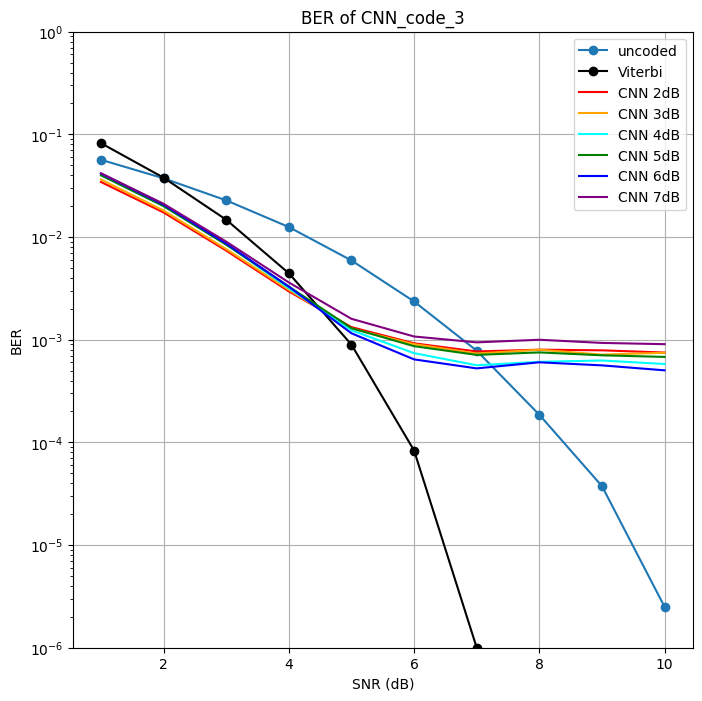

CNN 2dB: [0.0311883334, 0.0151450001, 0.0064216666, 0.0020508333, 0.0006616667, 0.0002975, 0.0001958333, 0.0002, 0.0001733333, 0.0001991667]
CNN 3dB: [0.0337533318, 0.0168808326, 0.0069508334, 0.0022383332, 0.0006483333, 0.0002408333, 0.0001775, 0.0001408333, 0.0001408333, 0.0001483333]
CNN 4dB: [0.0363058336, 0.0180050004, 0.0073133335, 0.0023741666, 0.0006, 0.0001933333, 7.41667e-05, 6.08333e-05, 7e-05, 6.5e-05]
CNN 5dB: [0.0375441648, 0.0184891671, 0.0076049999, 0.0024008334, 0.000645, 0.0001775, 7.66667e-05, 7.5e-05, 6.08333e-05, 6.41667e-05]
CNN 6dB: [0.0390900001, 0.0193158332, 0.0079633333, 0.0025133332, 0.0006333333, 0.0001866667, 7.16667e-05, 6.91667e-05, 5.33333e-05, 5.75e-05]
CNN 7dB: [0.0384549983, 0.0190274995, 0.0078941667, 0.0024833332, 0.0006833333, 0.0001658333, 7.83333e-05, 5.33333e-05, 6.83333e-05, 5.16667e-05]


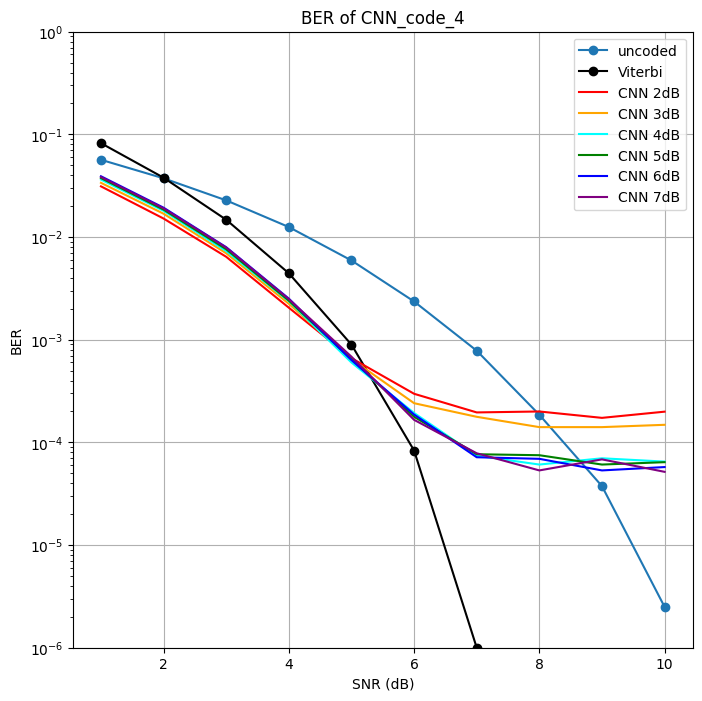

CNN 2dB: [0.0329658315, 0.0162441675, 0.0069341664, 0.0025825, 0.0010075, 0.000635, 0.0005091667, 0.0005441667, 0.00054, 0.0005225]
CNN 3dB: [0.0354041681, 0.0175508335, 0.0073008332, 0.0026891667, 0.0009383333, 0.0004875, 0.0004025, 0.000445, 0.0004091667, 0.0004116667]
CNN 4dB: [0.0389058329, 0.0193399992, 0.0081599997, 0.0028241666, 0.0009575, 0.0005066667, 0.0004008333, 0.0004191667, 0.0003691667, 0.0003616667]
CNN 5dB: [0.0397050008, 0.019716667, 0.0082350001, 0.0029499999, 0.00095, 0.0004741667, 0.0003658333, 0.0003883333, 0.0003158333, 0.0003516667]
CNN 6dB: [0.041389998, 0.0205241665, 0.0085425004, 0.0030908333, 0.0010066667, 0.0004991667, 0.0003883333, 0.0004308333, 0.0003883333, 0.0003491667]
CNN 7dB: [0.0417458341, 0.0208583325, 0.0087425001, 0.0031758333, 0.0010841667, 0.0005291667, 0.0004233333, 0.0004633333, 0.000415, 0.0003983333]


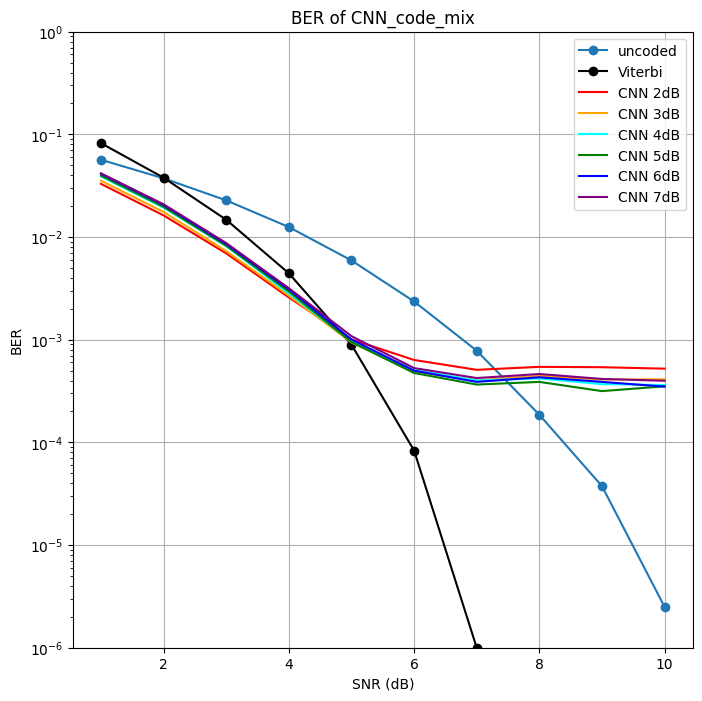

CCNN_FM 2dB: [0.0080666663, 0.0036599999, 0.0013725, 0.000405, 8.41667e-05, 2.5e-05, 4.1667e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0112133333, 0.0052683335, 0.0020391666, 0.0006325, 0.0001366667, 3.83333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0154883331, 0.0073925001, 0.0028616667, 0.0009608333, 0.00022, 3.83333e-05, 5.8333e-06, 0.0, 0.0, 0.0]
CCNN_FM 5dB: [0.0183450002, 0.0087883333, 0.0035208333, 0.0011308333, 0.0002433333, 5.16667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 6dB: [0.0194474999, 0.0093724998, 0.0038041666, 0.0012158334, 0.0002641667, 5.5e-05, 9.1667e-06, 0.0, 0.0, 0.0]
CCNN_FM 7dB: [0.0203991663, 0.0098449998, 0.0039949999, 0.0012991667, 0.0002783333, 6.25e-05, 7.5e-06, 0.0, 0.0, 0.0]


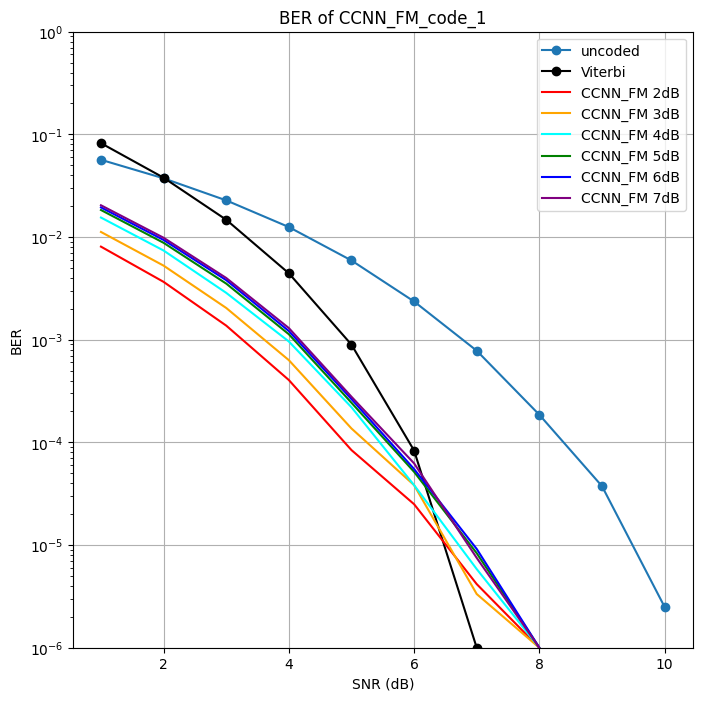

CCNN_FM 2dB: [0.0188266672, 0.0085774995, 0.0033475, 0.0010691667, 0.0002725, 5.16667e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0241800006, 0.011354167, 0.0045949998, 0.0014016667, 0.0003608333, 7.75e-05, 5.8333e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0265508331, 0.0125000002, 0.0050674998, 0.0015733333, 0.000375, 8.41667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 5dB: [0.0296666659, 0.0141008329, 0.0057974998, 0.001805, 0.0004433333, 9.08333e-05, 9.1667e-06, 0.0, 0.0, 0.0]
CCNN_FM 6dB: [0.0300616659, 0.0143708335, 0.0058766669, 0.0018391666, 0.0004508333, 9.16667e-05, 1.08333e-05, 0.0, 0.0, 0.0]
CCNN_FM 7dB: [0.0305774994, 0.0146000003, 0.0059991665, 0.0018541666, 0.0004575, 9.66667e-05, 1.16667e-05, 0.0, 0.0, 0.0]


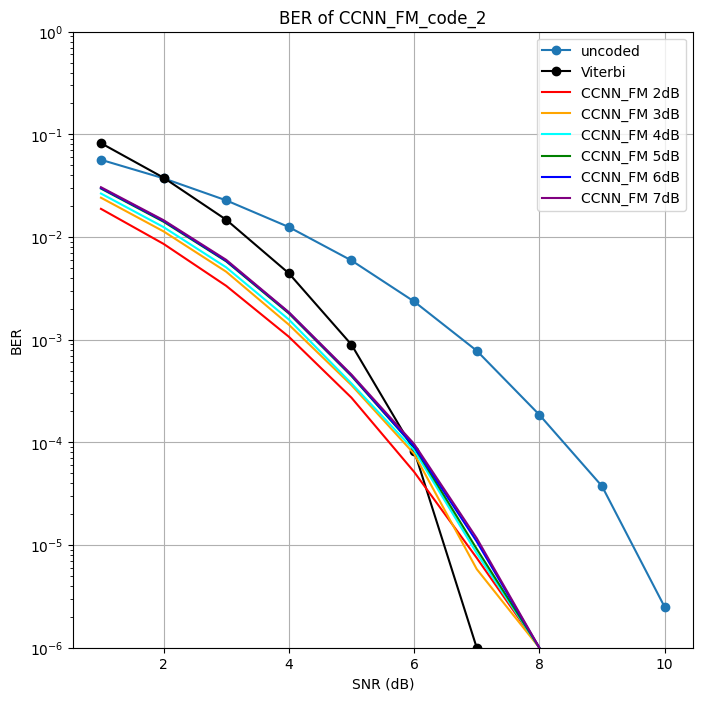

CCNN_FM 2dB: [0.0142683331, 0.0066791666, 0.0025991667, 0.0008283333, 0.00019, 5.33333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0173141658, 0.0080575002, 0.0032316667, 0.0010058334, 0.0002425, 6.08333e-05, 6.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0214741658, 0.0102824997, 0.0041491669, 0.0013033333, 0.0003125, 7.16667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 5dB: [0.0248858333, 0.0121050002, 0.0048933332, 0.001575, 0.0003858333, 8.16667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 6dB: [0.0246824995, 0.0120700002, 0.0049075, 0.0015541667, 0.0003725, 9.08333e-05, 1.08333e-05, 0.0, 0.0, 0.0]
CCNN_FM 7dB: [0.0248883329, 0.012203333, 0.0049083335, 0.0015533334, 0.0003925, 8.41667e-05, 8.3333e-06, 0.0, 0.0, 0.0]


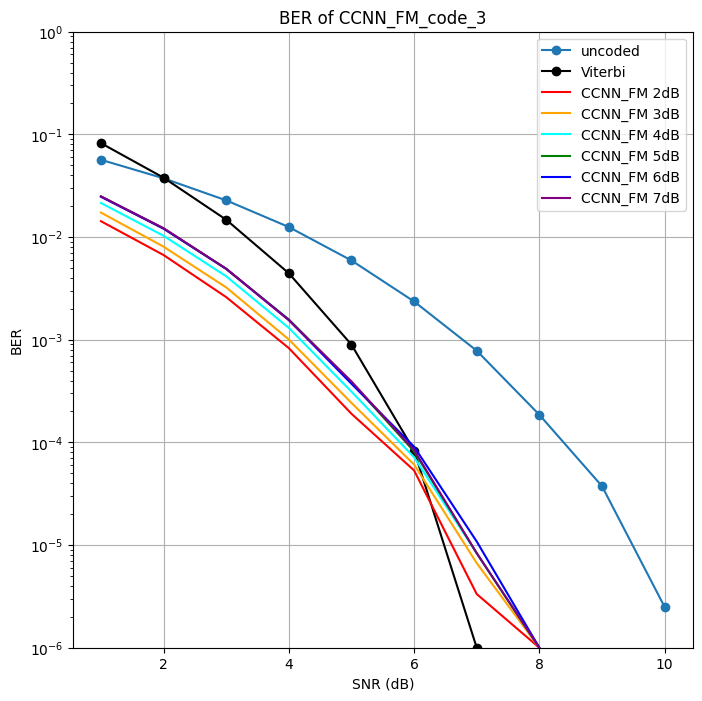

CCNN_FM 2dB: [0.0166683327, 0.0077008335, 0.0030350001, 0.0009558334, 0.0002483333, 5.33333e-05, 1.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.020471666, 0.0099083334, 0.0039258334, 0.0012325, 0.0003166667, 7e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0219800007, 0.010675, 0.0043199998, 0.0013641666, 0.0003225, 7.75e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 5dB: [0.0255241673, 0.0123616662, 0.0050516669, 0.001535, 0.0003908333, 9.08333e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 6dB: [0.025345834, 0.0123808337, 0.0049941665, 0.0015408334, 0.0004041667, 9.33333e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 7dB: [0.0250924993, 0.0122250002, 0.0049516666, 0.0015033333, 0.0004025, 9.33333e-05, 5e-06, 0.0, 0.0, 0.0]


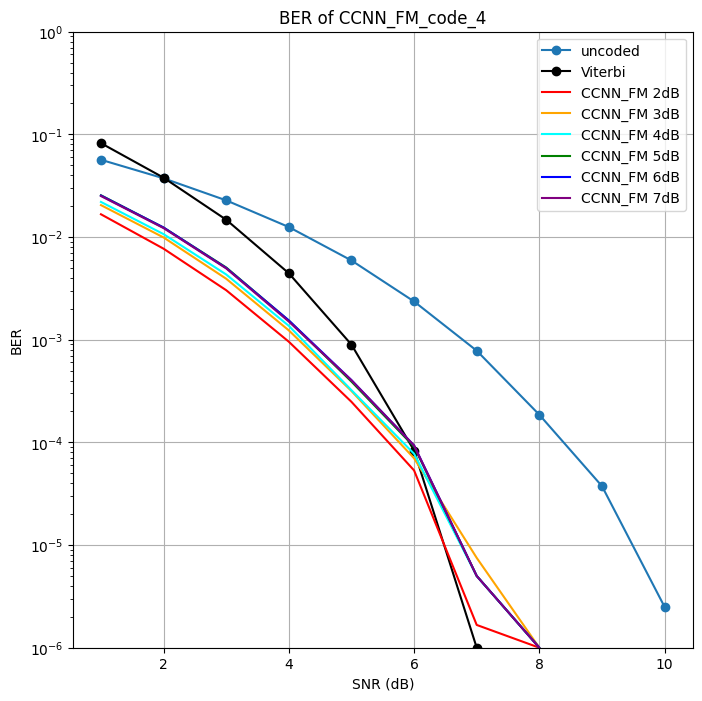

CCNN_FM 2dB: [0.0144499997, 0.0066383332, 0.0026108334, 0.00082, 0.0001783333, 4.75e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0182416663, 0.0086091664, 0.0034691666, 0.0010758333, 0.000245, 5.91667e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0212999992, 0.0102474997, 0.0041341665, 0.001335, 0.0002941667, 6.33333e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 5dB: [0.0245791674, 0.01186, 0.004865, 0.00153, 0.0003508333, 7.5e-05, 6.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 6dB: [0.0248558335, 0.0120508336, 0.0049100001, 0.0015533334, 0.000355, 7.41667e-05, 6.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 7dB: [0.0251425002, 0.0121633336, 0.0049975002, 0.0015583333, 0.0003741667, 7.83333e-05, 5e-06, 0.0, 0.0, 0.0]


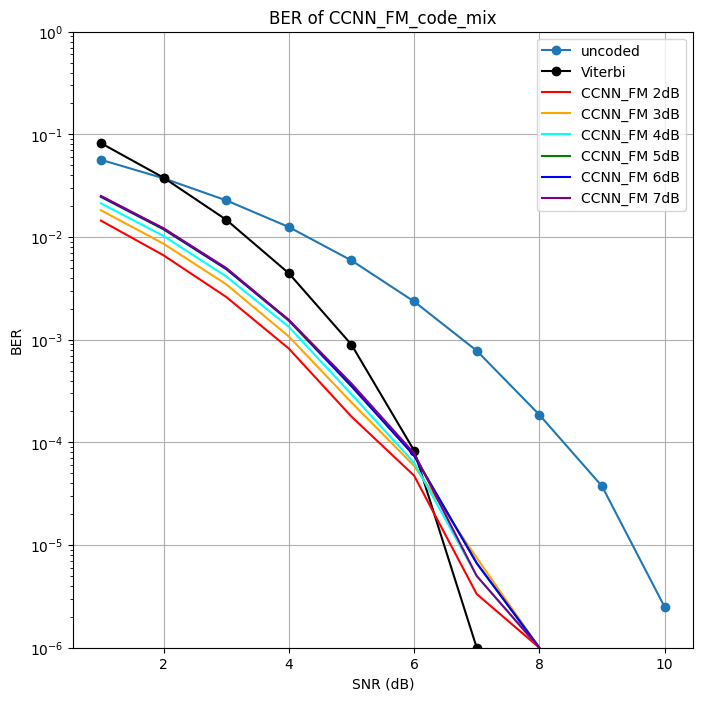

In [43]:
for test_code in code_names:
    utils.draw_BER_single(result_dir, BERs_uncoded, BERs_hard, 3, test_code, train_range, test_range)
for test_code in code_names:
    utils.draw_BER_single(result_dir, BERs_uncoded, BERs_hard, 6, test_code, train_range, test_range)
# for test_code in code_names:
#     utils.draw_BER_single(result_dir, BERs_uncoded, 6, test_code, train_range, test_range)
# for test_code in code_names:
#     utils.draw_BER_single(result_dir, BERs_uncoded, 7, test_code, train_range, test_range)

##### Draw CNN vs CCNN_AL

In [11]:
# for test_code in code_names:
#     utils.draw_BER_compare(result_dir, BERs_uncoded, 0, 7, test_code, train_range, test_range)

##### Draw CCNN_FM vs CCNN_FM

In [12]:
# for test_code in code_names:
#     utils.draw_BER_compare(result_dir, BERs_uncoded, 2, 6, test_code, train_range, test_range)

##### Draw CNN vs CCNN_FM

CNN 2dB: [0.0320724994, 0.0160358325, 0.0069283335, 0.0029800001, 0.0014191667, 0.0010425, 0.000955, 0.0010058334, 0.0009633334, 0.0009541666]
CCNN_FM 2dB: [0.0080666663, 0.0036599999, 0.0013725, 0.000405, 8.41667e-05, 2.5e-05, 4.1667e-06, 0.0, 0.0, 0.0]
['74.85%', '77.18%', '80.19%', '86.41%', '94.07%', '97.6%', '99.56%', '99.9%', '100.0%', '100.0%']
CNN 3dB: [0.0332108326, 0.0167016666, 0.0071358331, 0.0028425001, 0.0011883334, 0.0008083333, 0.000695, 0.0007216667, 0.0007566666, 0.0006858333]
CCNN_FM 3dB: [0.0112133333, 0.0052683335, 0.0020391666, 0.0006325, 0.0001366667, 3.83333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
['66.24%', '68.46%', '71.42%', '77.75%', '88.5%', '95.26%', '99.52%', '99.86%', '100.0%', '100.0%']
CNN 4dB: [0.0369899981, 0.0187775008, 0.0080399998, 0.0032783332, 0.0013275, 0.0009516667, 0.0008058333, 0.0008616667, 0.0008341667, 0.0007475]
CCNN_FM 4dB: [0.0154883331, 0.0073925001, 0.0028616667, 0.0009608333, 0.00022, 3.83333e-05, 5.8333e-06, 0.0, 0.0, 0.0]
['58.13%', '60.6

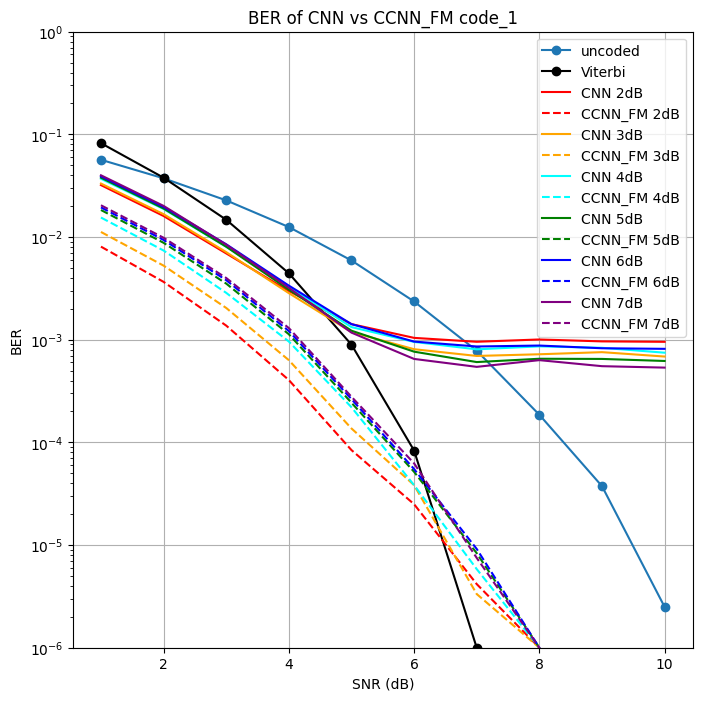

CNN 2dB: [0.0337449983, 0.0163258333, 0.0066908333, 0.002145, 0.0007058333, 0.0002491667, 0.0001591667, 0.0001566667, 0.0001191667, 0.0001541667]
CCNN_FM 2dB: [0.0188266672, 0.0085774995, 0.0033475, 0.0010691667, 0.0002725, 5.16667e-05, 7.5e-06, 0.0, 0.0, 0.0]
['44.21%', '47.46%', '49.97%', '50.16%', '61.39%', '79.26%', '95.29%', '99.36%', '100.0%', '100.0%']
CNN 3dB: [0.0378758349, 0.0183083341, 0.0073633334, 0.0022700001, 0.0006208333, 0.0001125, 3.41667e-05, 1.5e-05, 2e-05, 1.91667e-05]
CCNN_FM 3dB: [0.0241800006, 0.011354167, 0.0045949998, 0.0014016667, 0.0003608333, 7.75e-05, 5.8333e-06, 0.0, 0.0, 0.0]
['36.16%', '37.98%', '37.6%', '38.25%', '41.88%', '31.11%', '82.93%', '93.33%', '100.0%', '100.0%']
CNN 4dB: [0.0418200009, 0.0203283336, 0.008310833, 0.0026216668, 0.0007041667, 0.0001491667, 5.66667e-05, 4.75e-05, 3.66667e-05, 4.83333e-05]
CCNN_FM 4dB: [0.0265508331, 0.0125000002, 0.0050674998, 0.0015733333, 0.000375, 8.41667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
['36.51%', '38.51%', '3

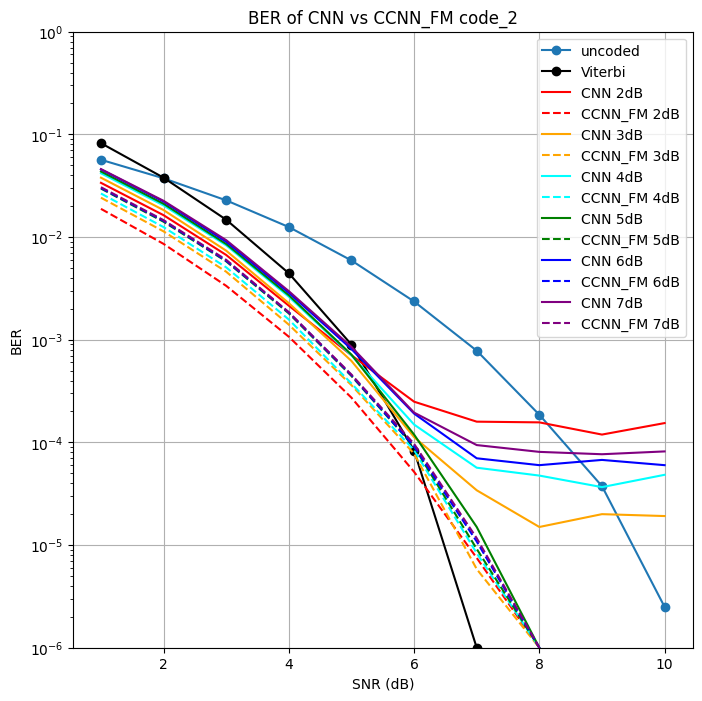

CNN 2dB: [0.034389168, 0.0173591673, 0.0073808334, 0.0029541666, 0.0013266667, 0.0009225, 0.0007683333, 0.0008, 0.0007883334, 0.00075]
CCNN_FM 2dB: [0.0142683331, 0.0066791666, 0.0025991667, 0.0008283333, 0.00019, 5.33333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
['58.51%', '61.52%', '64.78%', '71.96%', '85.68%', '94.22%', '99.57%', '99.87%', '100.0%', '100.0%']
CNN 3dB: [0.0363333337, 0.0181041658, 0.0076333331, 0.003055, 0.0012825, 0.000905, 0.0007341666, 0.0007991667, 0.0007158333, 0.0007458333]
CCNN_FM 3dB: [0.0173141658, 0.0080575002, 0.0032316667, 0.0010058334, 0.0002425, 6.08333e-05, 6.6667e-06, 0.0, 0.0, 0.0]
['52.35%', '55.49%', '57.66%', '67.08%', '81.09%', '93.28%', '99.09%', '99.87%', '100.0%', '100.0%']
CNN 4dB: [0.0404075012, 0.0201458335, 0.0085158329, 0.0031699999, 0.001235, 0.00074, 0.0005641667, 0.0006091667, 0.0006275, 0.00058]
CCNN_FM 4dB: [0.0214741658, 0.0102824997, 0.0041491669, 0.0013033333, 0.0003125, 7.16667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
['46.86%', '48.96%', '51.28%',

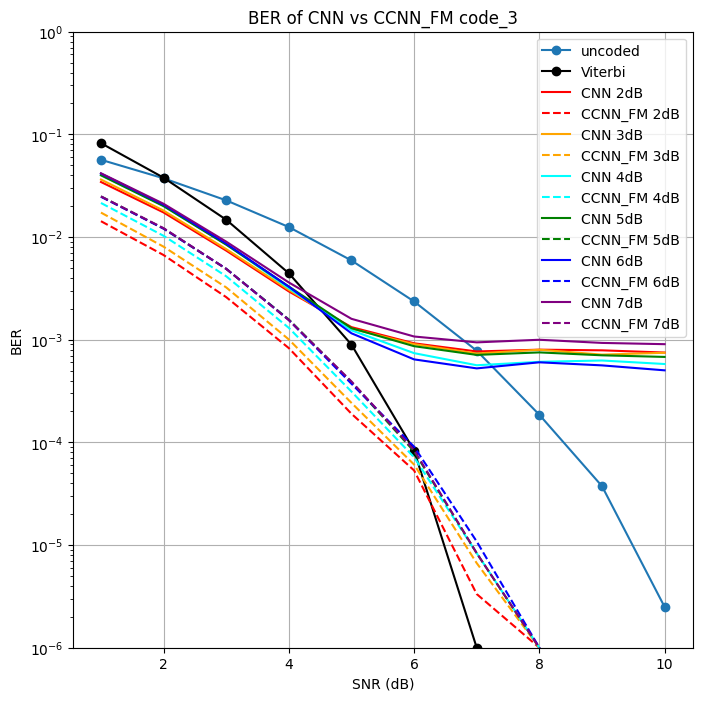

CNN 2dB: [0.0311883334, 0.0151450001, 0.0064216666, 0.0020508333, 0.0006616667, 0.0002975, 0.0001958333, 0.0002, 0.0001733333, 0.0001991667]
CCNN_FM 2dB: [0.0166683327, 0.0077008335, 0.0030350001, 0.0009558334, 0.0002483333, 5.33333e-05, 1.6667e-06, 0.0, 0.0, 0.0]
['46.56%', '49.15%', '52.74%', '53.39%', '62.47%', '82.07%', '99.15%', '99.5%', '100.0%', '100.0%']
CNN 3dB: [0.0337533318, 0.0168808326, 0.0069508334, 0.0022383332, 0.0006483333, 0.0002408333, 0.0001775, 0.0001408333, 0.0001408333, 0.0001483333]
CCNN_FM 3dB: [0.020471666, 0.0099083334, 0.0039258334, 0.0012325, 0.0003166667, 7e-05, 7.5e-06, 0.0, 0.0, 0.0]
['39.35%', '41.3%', '43.52%', '44.94%', '51.16%', '70.93%', '95.77%', '99.29%', '100.0%', '100.0%']
CNN 4dB: [0.0363058336, 0.0180050004, 0.0073133335, 0.0023741666, 0.0006, 0.0001933333, 7.41667e-05, 6.08333e-05, 7e-05, 6.5e-05]
CCNN_FM 4dB: [0.0219800007, 0.010675, 0.0043199998, 0.0013641666, 0.0003225, 7.75e-05, 5e-06, 0.0, 0.0, 0.0]
['39.46%', '40.71%', '40.93%', '42.54%

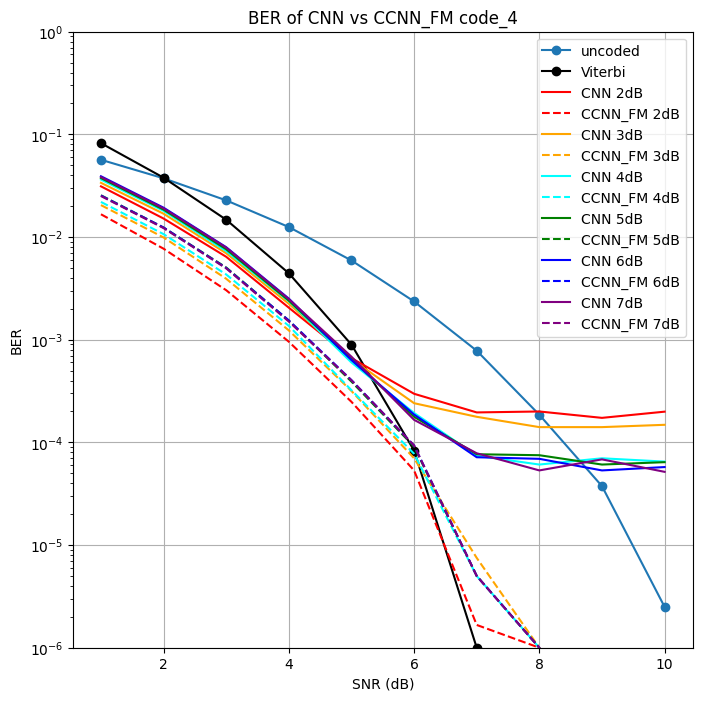

CNN 2dB: [0.0329658315, 0.0162441675, 0.0069341664, 0.0025825, 0.0010075, 0.000635, 0.0005091667, 0.0005441667, 0.00054, 0.0005225]
CCNN_FM 2dB: [0.0144499997, 0.0066383332, 0.0026108334, 0.00082, 0.0001783333, 4.75e-05, 3.3333e-06, 0.0, 0.0, 0.0]
['56.17%', '59.13%', '62.35%', '68.25%', '82.3%', '92.52%', '99.35%', '99.82%', '100.0%', '100.0%']
CNN 3dB: [0.0354041681, 0.0175508335, 0.0073008332, 0.0026891667, 0.0009383333, 0.0004875, 0.0004025, 0.000445, 0.0004091667, 0.0004116667]
CCNN_FM 3dB: [0.0182416663, 0.0086091664, 0.0034691666, 0.0010758333, 0.000245, 5.91667e-05, 7.5e-06, 0.0, 0.0, 0.0]
['48.48%', '50.95%', '52.48%', '59.99%', '73.89%', '87.86%', '98.14%', '99.78%', '100.0%', '100.0%']
CNN 4dB: [0.0389058329, 0.0193399992, 0.0081599997, 0.0028241666, 0.0009575, 0.0005066667, 0.0004008333, 0.0004191667, 0.0003691667, 0.0003616667]
CCNN_FM 4dB: [0.0212999992, 0.0102474997, 0.0041341665, 0.001335, 0.0002941667, 6.33333e-05, 5e-06, 0.0, 0.0, 0.0]
['45.25%', '47.01%', '49.34%', '

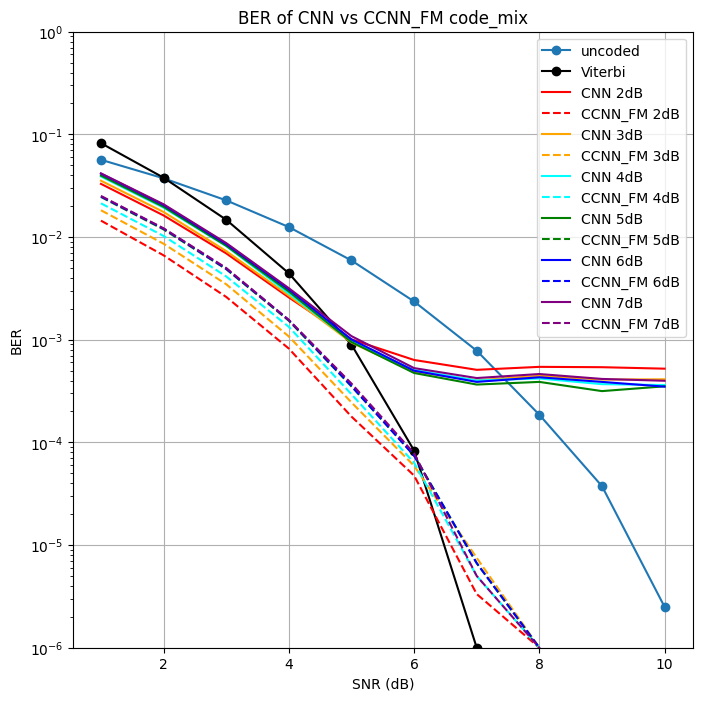

In [44]:
for test_code in code_names:
    utils.draw_BER_compare(result_dir, BERs_uncoded, BERs_hard, 3, 6, test_code, train_range, test_range)

In [47]:
# utils.draw_diff(result_dir, code_names, md.model_names[3], md.model_names[6], train_range, test_range)  

In [14]:
# for test_code in code_names:
#     utils.draw_BER_compare(result_dir, BERs_uncoded, 7, 6, test_code, train_range, test_range)

## Train Classifier

In [5]:
print(f"Classify Epochs: {config['classifier']['epochs']}")

Classify Epochs: 100


In [16]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_classifier(device, config, result_dir, code_name=train_code, SNR_model=SNR_model)

Train CNN Model with SNR = 2 dB
Epoch 1: [30000 / 100000] (30 %)  Loss: 1.460335  Accuracy: 0.248100
Epoch 1: [60000 / 100000] (60 %)  Loss: 1.460335  Accuracy: 0.250250
Epoch 1: [90000 / 100000] (90 %)  Loss: 1.473668  Accuracy: 0.249511
Epoch 2: [30000 / 100000] (30 %)  Loss: 1.523668  Accuracy: 0.250600
Epoch 2: [60000 / 100000] (60 %)  Loss: 1.477002  Accuracy: 0.250800
Epoch 2: [90000 / 100000] (90 %)  Loss: 1.467002  Accuracy: 0.249644
Epoch 3: [30000 / 100000] (30 %)  Loss: 1.490335  Accuracy: 0.251033
Epoch 3: [60000 / 100000] (60 %)  Loss: 1.497002  Accuracy: 0.250417
Epoch 3: [90000 / 100000] (90 %)  Loss: 1.483668  Accuracy: 0.249833
Epoch 4: [30000 / 100000] (30 %)  Loss: 1.477002  Accuracy: 0.249233
Epoch 4: [60000 / 100000] (60 %)  Loss: 0.972261  Accuracy: 0.362450
Epoch 4: [90000 / 100000] (90 %)  Loss: 0.833242  Accuracy: 0.537200
Epoch 5: [30000 / 100000] (30 %)  Loss: 0.801788  Accuracy: 0.946267
Epoch 5: [60000 / 100000] (60 %)  Loss: 0.781596  Accuracy: 0.947350
Ep

Epoch 16: [60000 / 100000] (60 %)  Loss: 0.760733  Accuracy: 0.980300
Epoch 16: [90000 / 100000] (90 %)  Loss: 0.766043  Accuracy: 0.979722
Epoch 17: [30000 / 100000] (30 %)  Loss: 0.753415  Accuracy: 0.981233
Epoch 17: [60000 / 100000] (60 %)  Loss: 0.775679  Accuracy: 0.980183
Epoch 17: [90000 / 100000] (90 %)  Loss: 0.757717  Accuracy: 0.980056
Epoch 18: [30000 / 100000] (30 %)  Loss: 0.769755  Accuracy: 0.982133
Epoch 18: [60000 / 100000] (60 %)  Loss: 0.774155  Accuracy: 0.980533
Epoch 18: [90000 / 100000] (90 %)  Loss: 0.762442  Accuracy: 0.980778
Epoch 19: [30000 / 100000] (30 %)  Loss: 0.749492  Accuracy: 0.982300
Epoch 19: [60000 / 100000] (60 %)  Loss: 0.771263  Accuracy: 0.981667
Epoch 19: [90000 / 100000] (90 %)  Loss: 0.757283  Accuracy: 0.981311
Epoch 20: [30000 / 100000] (30 %)  Loss: 0.748898  Accuracy: 0.982867
Epoch 20: [60000 / 100000] (60 %)  Loss: 0.764567  Accuracy: 0.982067
Epoch 20: [90000 / 100000] (90 %)  Loss: 0.770775  Accuracy: 0.981500
Epoch 21: [30000 / 1

## Test Classifier

Test Classifier for code_mix, SNR = 2 dB


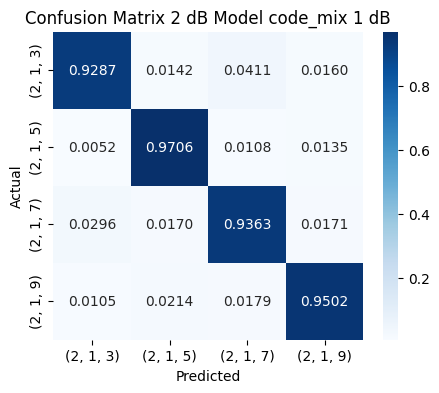

SNR: 1 dB, ACC: 0.94644


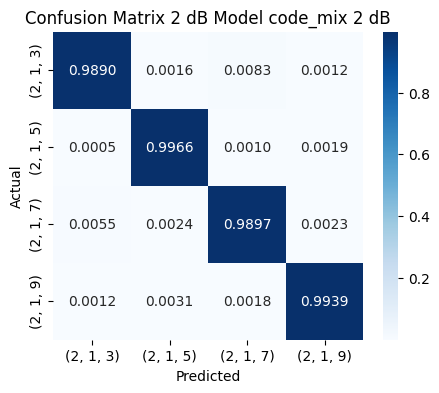

SNR: 2 dB, ACC: 0.9923


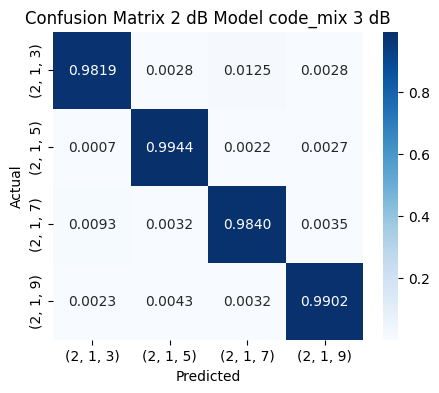

SNR: 3 dB, ACC: 0.98763


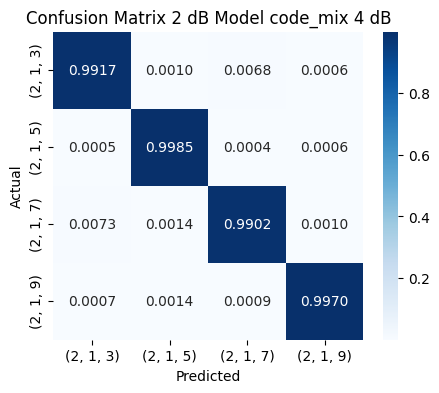

SNR: 4 dB, ACC: 0.99435


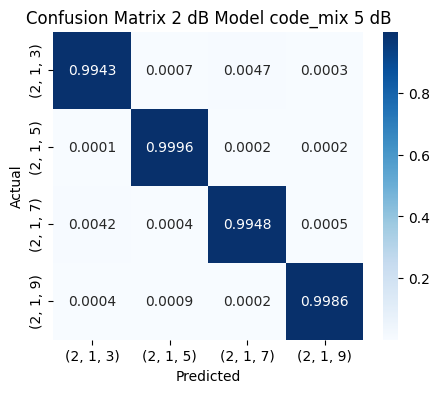

SNR: 5 dB, ACC: 0.99682


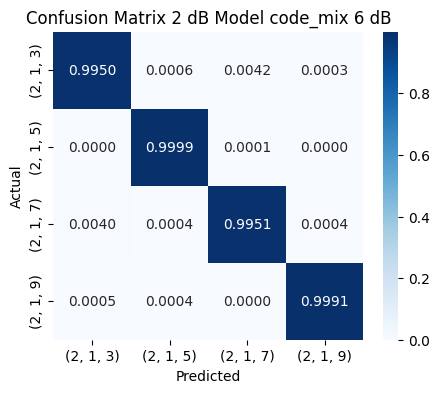

SNR: 6 dB, ACC: 0.99725


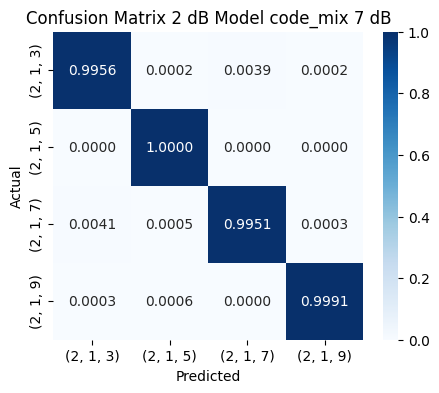

SNR: 7 dB, ACC: 0.99747


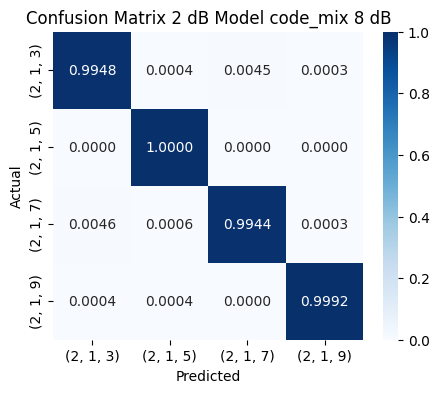

SNR: 8 dB, ACC: 0.99712


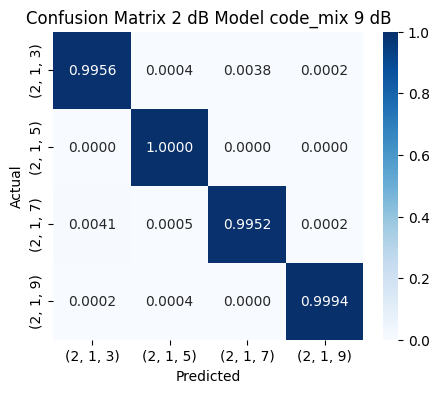

SNR: 9 dB, ACC: 0.99756


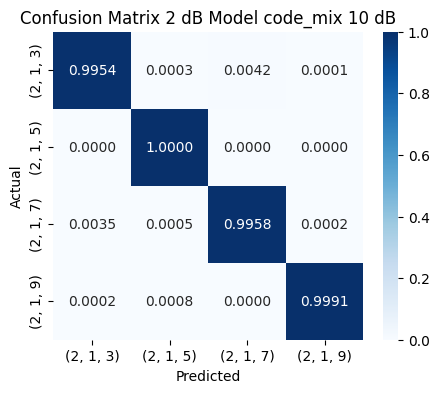

SNR: 10 dB, ACC: 0.99757
Test Classifier for code_mix, SNR = 3 dB


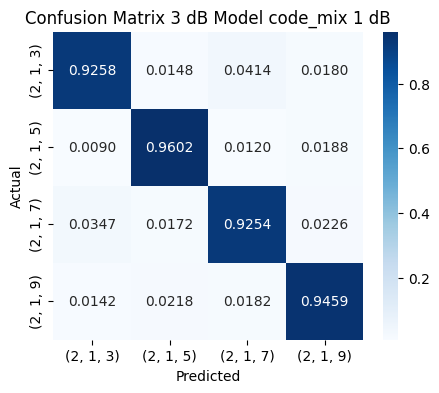

SNR: 1 dB, ACC: 0.93933


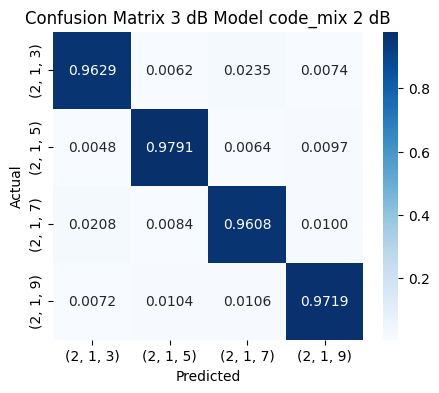

SNR: 2 dB, ACC: 0.96868


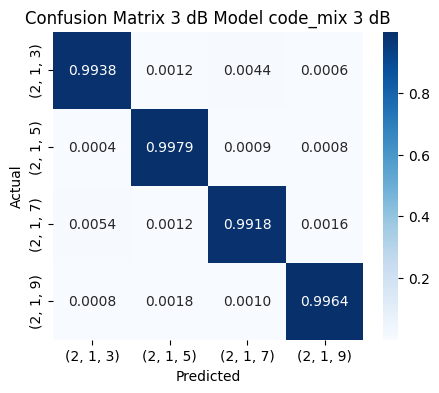

SNR: 3 dB, ACC: 0.99498


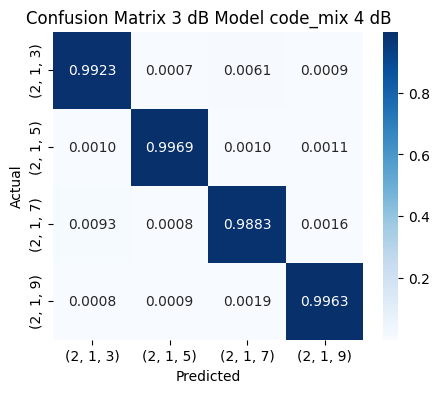

SNR: 4 dB, ACC: 0.99347


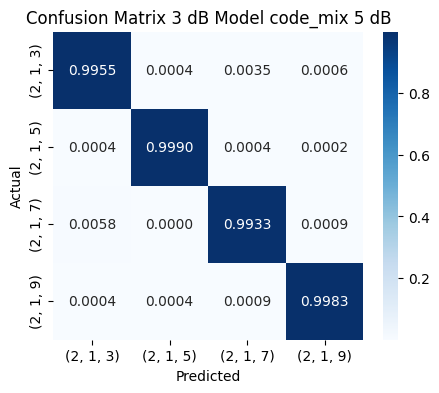

SNR: 5 dB, ACC: 0.99653


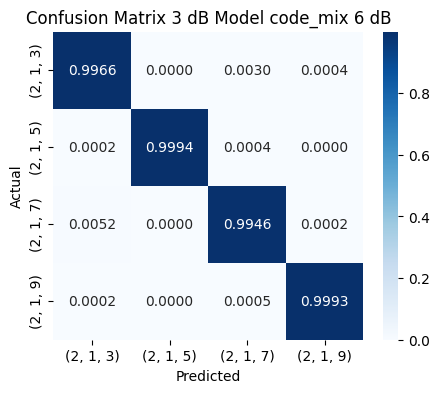

SNR: 6 dB, ACC: 0.99746


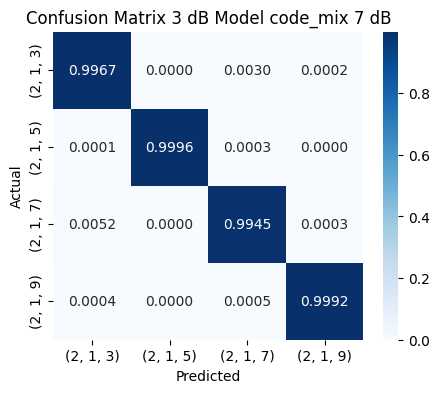

SNR: 7 dB, ACC: 0.99749


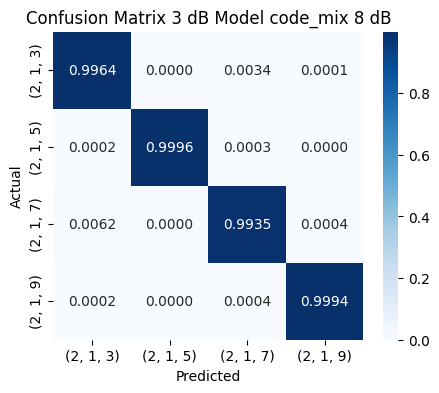

SNR: 8 dB, ACC: 0.99721


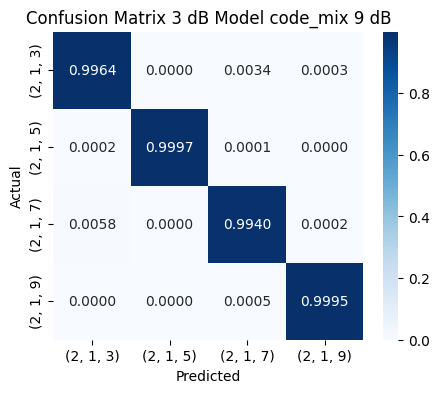

SNR: 9 dB, ACC: 0.99738


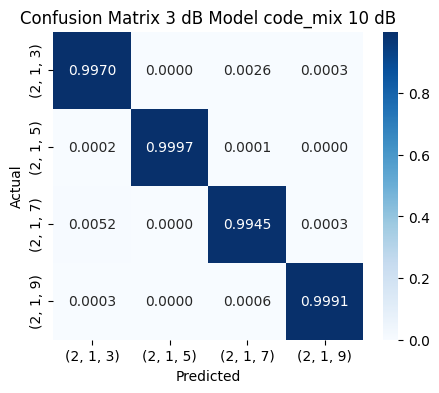

SNR: 10 dB, ACC: 0.99758
Test Classifier for code_mix, SNR = 4 dB


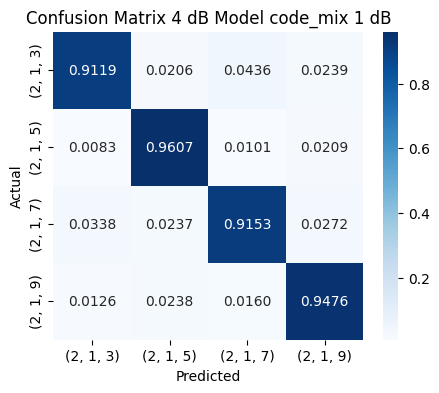

SNR: 1 dB, ACC: 0.93387


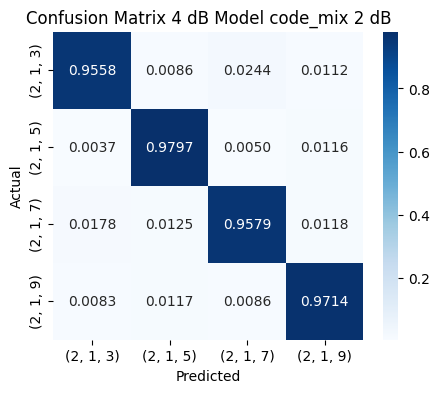

SNR: 2 dB, ACC: 0.9662


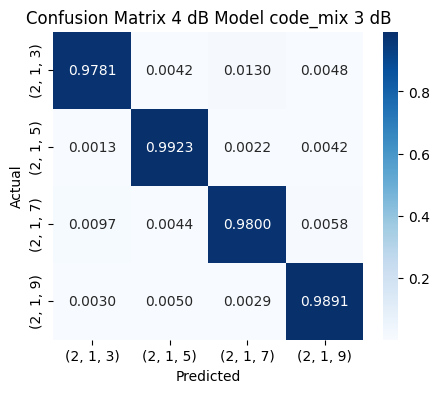

SNR: 3 dB, ACC: 0.98489


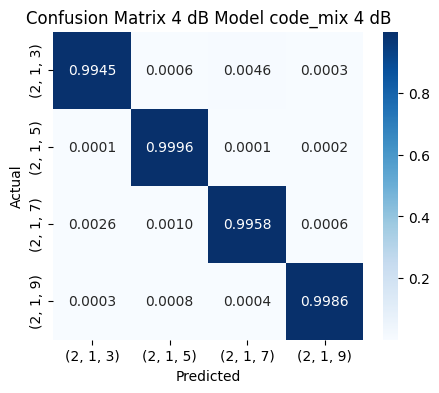

SNR: 4 dB, ACC: 0.99711


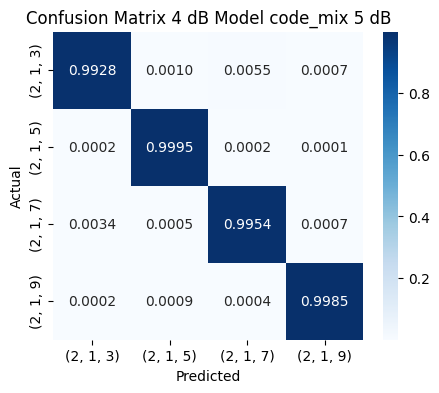

SNR: 5 dB, ACC: 0.99653


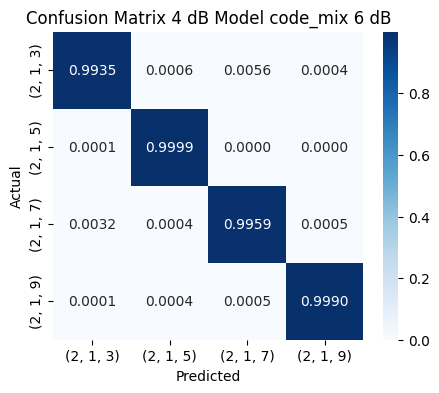

SNR: 6 dB, ACC: 0.99709


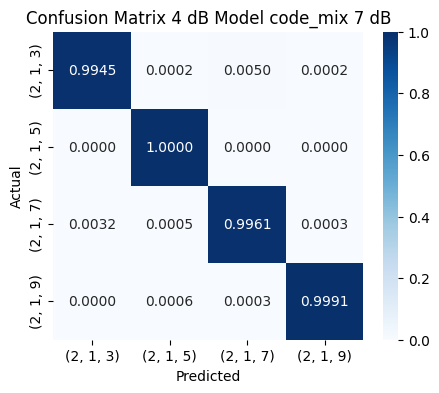

SNR: 7 dB, ACC: 0.99743


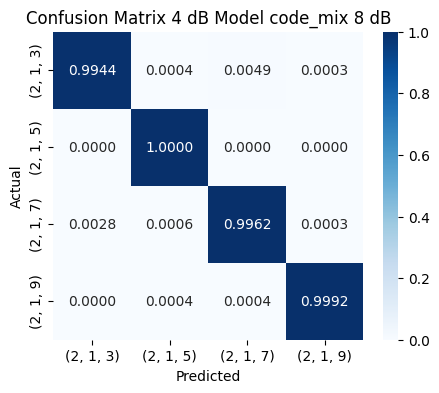

SNR: 8 dB, ACC: 0.99747


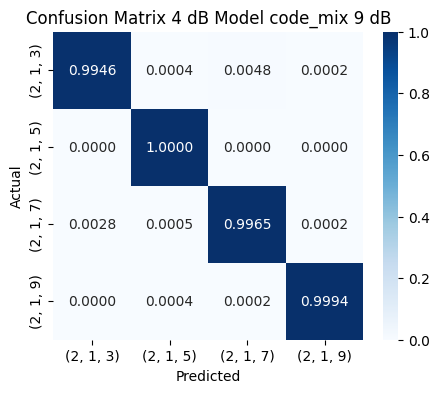

SNR: 9 dB, ACC: 0.99764


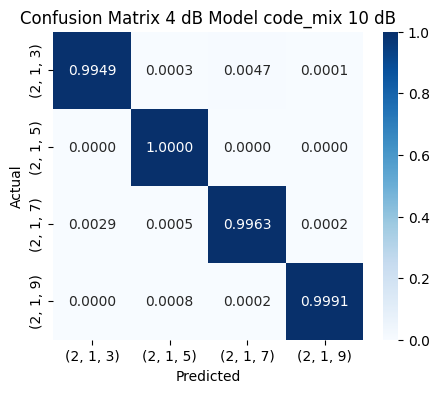

SNR: 10 dB, ACC: 0.99757
Test Classifier for code_mix, SNR = 5 dB


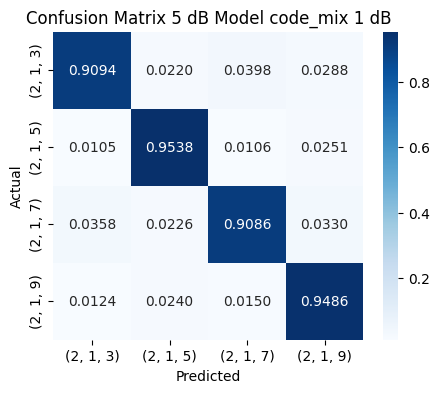

SNR: 1 dB, ACC: 0.93009


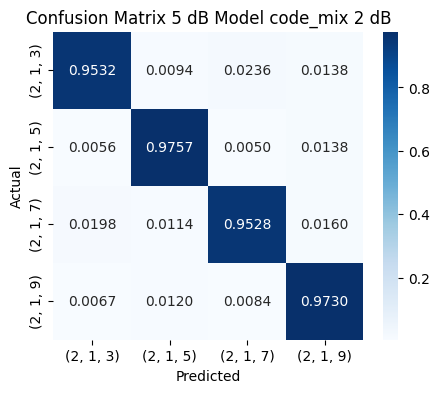

SNR: 2 dB, ACC: 0.96365


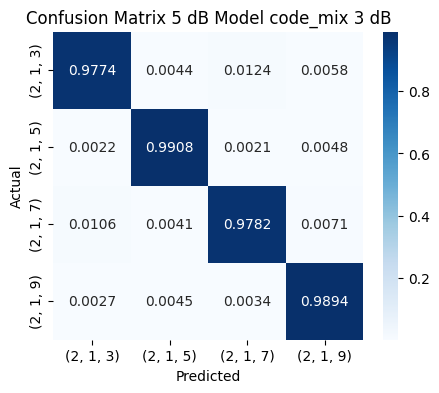

SNR: 3 dB, ACC: 0.98397


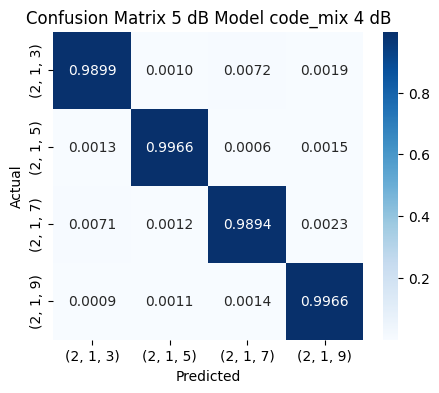

SNR: 4 dB, ACC: 0.9931


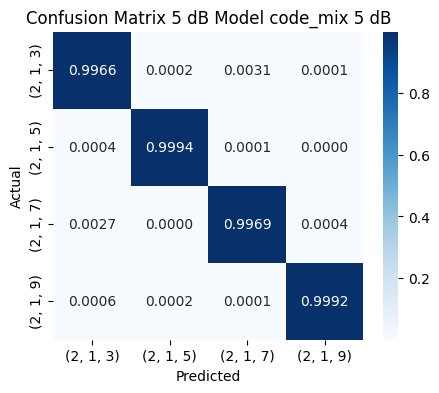

SNR: 5 dB, ACC: 0.99803


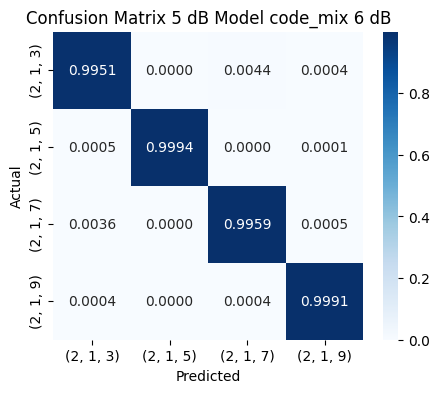

SNR: 6 dB, ACC: 0.99739


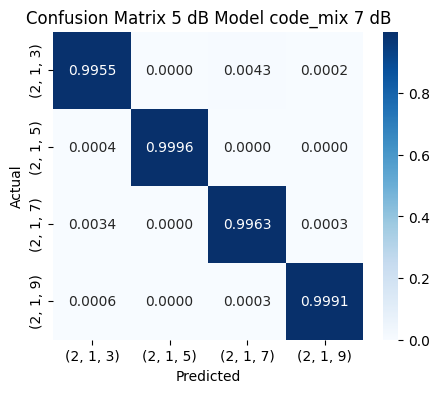

SNR: 7 dB, ACC: 0.99761


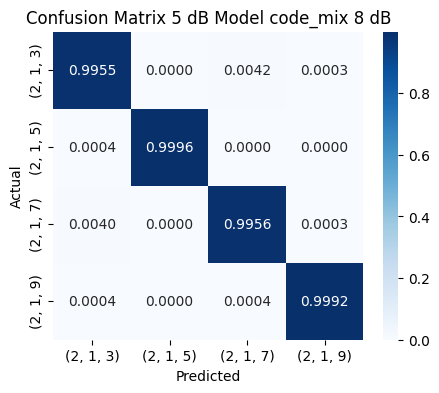

SNR: 8 dB, ACC: 0.99748


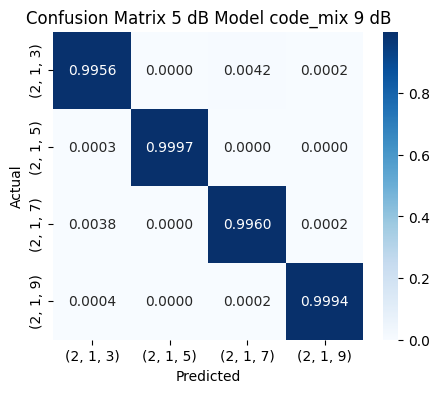

SNR: 9 dB, ACC: 0.99768


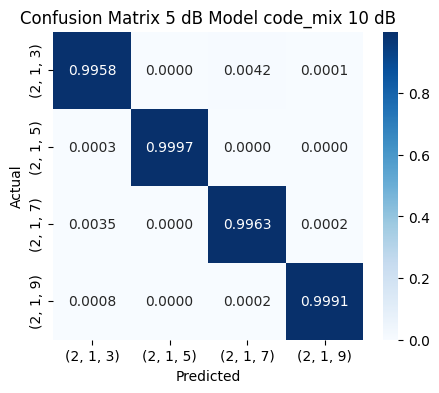

SNR: 10 dB, ACC: 0.99771
Test Classifier for code_mix, SNR = 6 dB


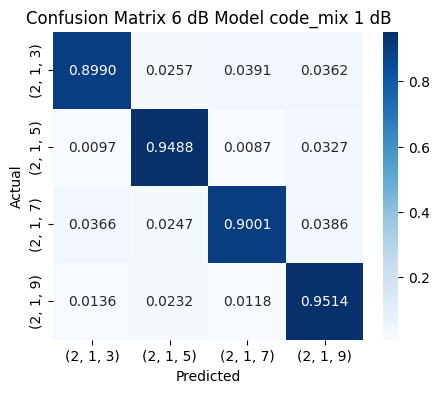

SNR: 1 dB, ACC: 0.92482


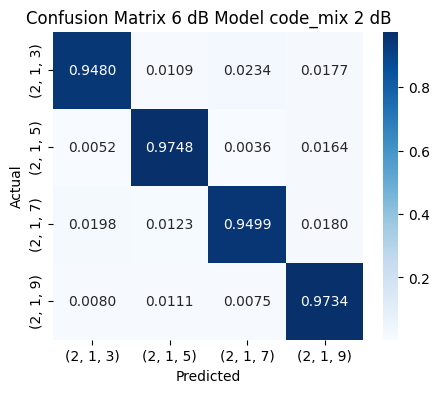

SNR: 2 dB, ACC: 0.96152


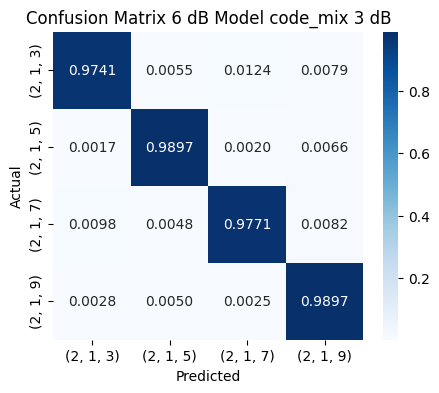

SNR: 3 dB, ACC: 0.98266


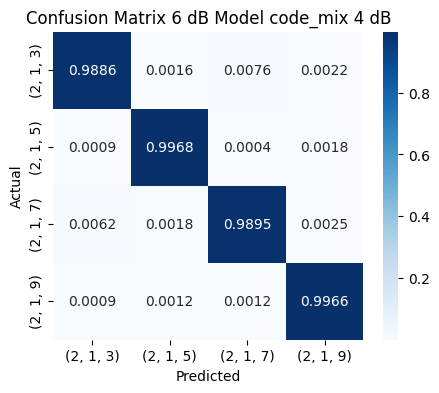

SNR: 4 dB, ACC: 0.9929


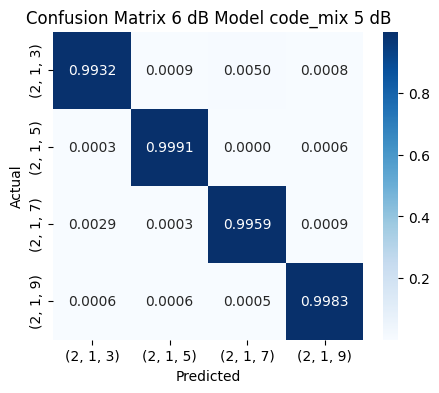

SNR: 5 dB, ACC: 0.99663


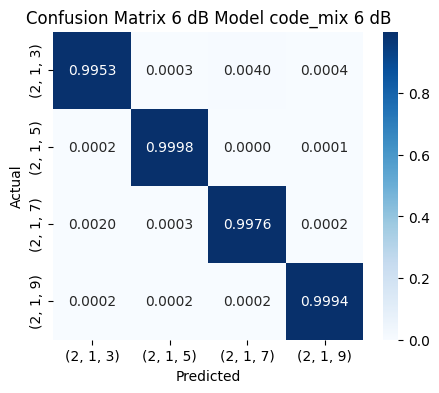

SNR: 6 dB, ACC: 0.99801


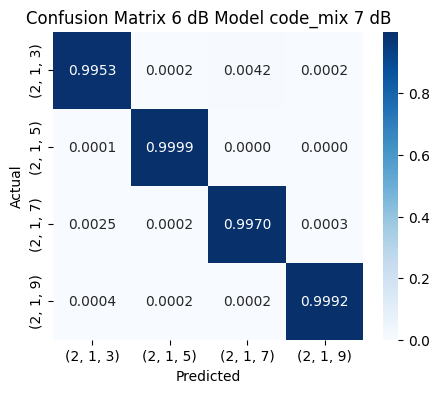

SNR: 7 dB, ACC: 0.99784


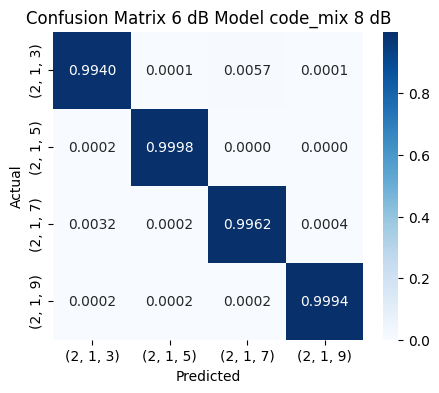

SNR: 8 dB, ACC: 0.99737


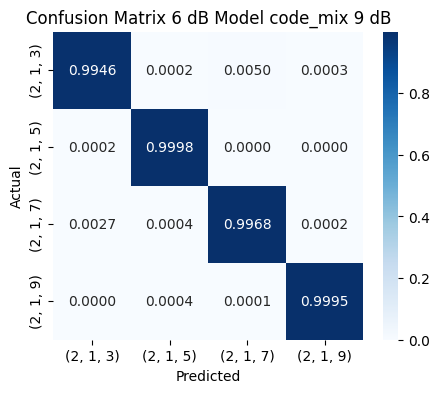

SNR: 9 dB, ACC: 0.99765


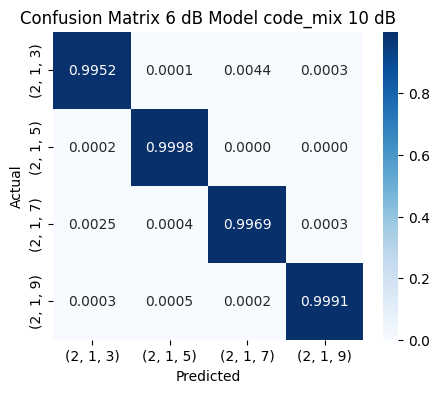

SNR: 10 dB, ACC: 0.99774
Test Classifier for code_mix, SNR = 7 dB


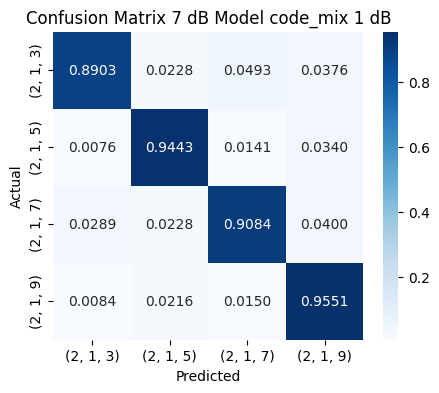

SNR: 1 dB, ACC: 0.92451


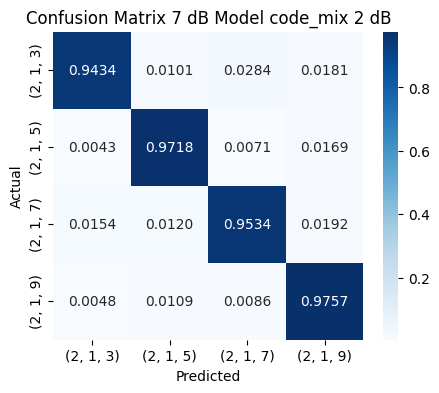

SNR: 2 dB, ACC: 0.96108


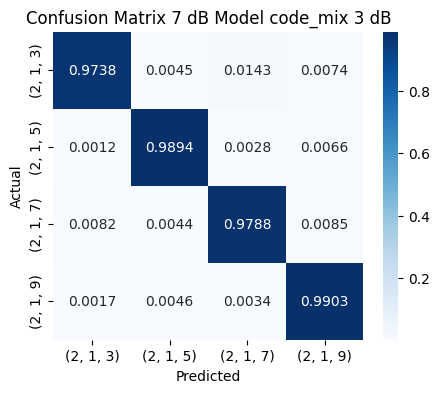

SNR: 3 dB, ACC: 0.98309


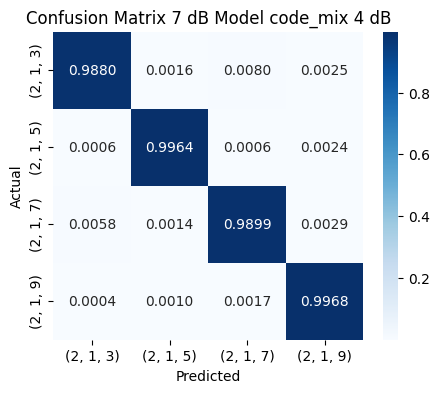

SNR: 4 dB, ACC: 0.99277


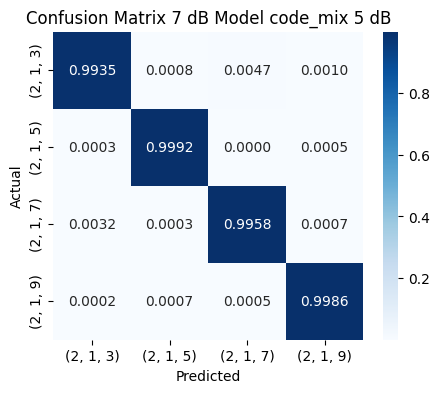

SNR: 5 dB, ACC: 0.99677


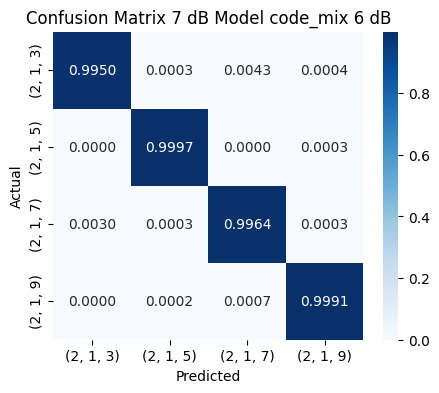

SNR: 6 dB, ACC: 0.99755


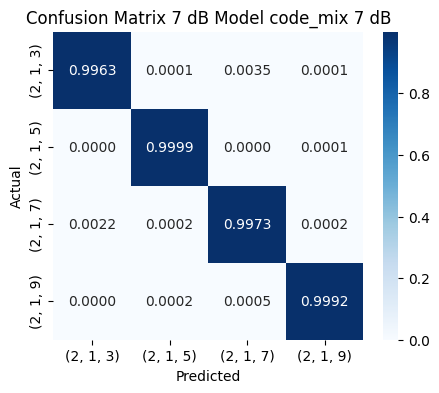

SNR: 7 dB, ACC: 0.99817


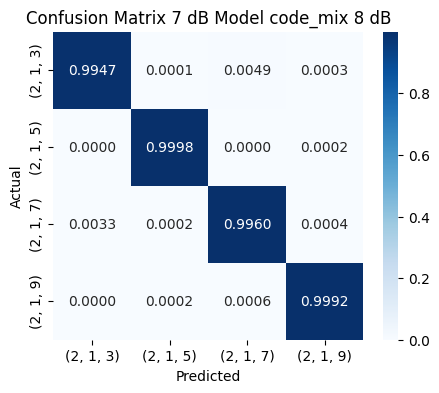

SNR: 8 dB, ACC: 0.99743


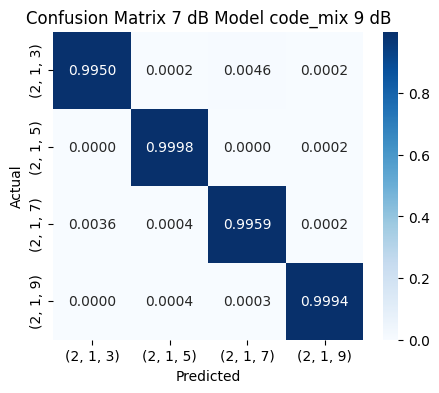

SNR: 9 dB, ACC: 0.99751


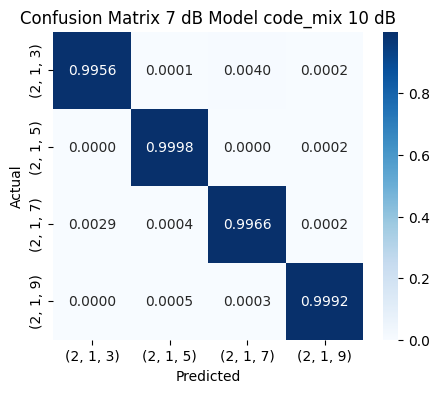

SNR: 10 dB, ACC: 0.99781


In [18]:
# for code_name in code_names:
for SNR_model in train_range:
    print(f"Test Classifier for {code_names[4]}, SNR = {SNR_model} dB")
    ACCs = testing.test_classifier(device, config, result_dir, code_names[4], SNR_model, test_range)

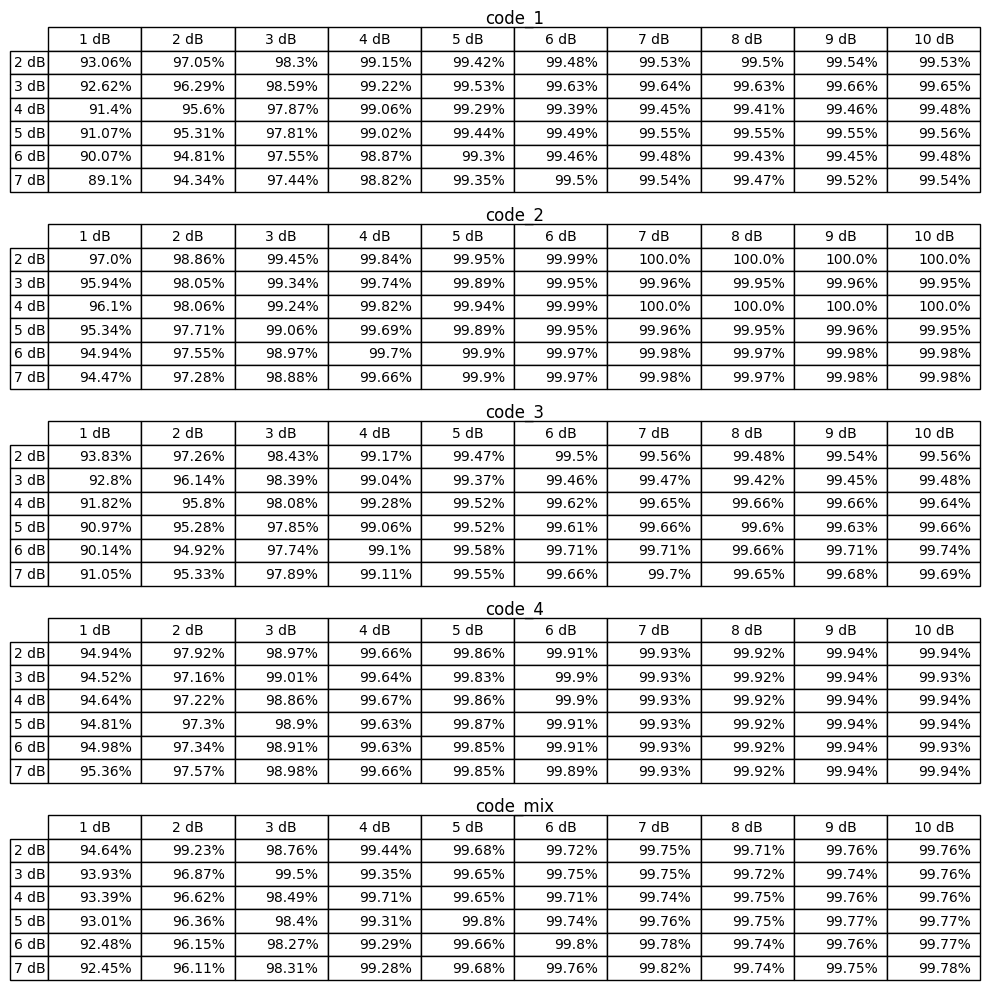

In [48]:
utils.draw_ACC(result_dir, code_names, train_range, test_range)

## Combine Test

In [19]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs, ACCs = testing.test_classifier_decoder(device, config, result_dir, code_name, 6, SNR_model, test_range)

SNR: 1 dB, ACC: 0.93062, BER: 0.033357501
SNR: 2 dB, ACC: 0.97051, BER: 0.014146667
SNR: 3 dB, ACC: 0.983, BER: 0.0068658334
SNR: 4 dB, ACC: 0.99152, BER: 0.0026941667
SNR: 5 dB, ACC: 0.99421, BER: 0.0012366667
SNR: 6 dB, ACC: 0.99482, BER: 0.0009058333
SNR: 7 dB, ACC: 0.99532, BER: 0.0007458333
SNR: 8 dB, ACC: 0.99498, BER: 0.0007808333
SNR: 9 dB, ACC: 0.99536, BER: 0.000755
SNR: 10 dB, ACC: 0.99528, BER: 0.0007475
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CCNN_FM_classifier_BER_code_1_2dB.pkl
/home/jxyang/projects/CNN/without_init_state/results/BCE_lr0001_fm150_ep300_dp01_1000_100/records/test/CCNN_FM_classifier_ACC_code_1_2dB.pkl
SNR: 1 dB, ACC: 0.92619, BER: 0.0379575007
SNR: 2 dB, ACC: 0.96293, BER: 0.0186858326
SNR: 3 dB, ACC: 0.98586, BER: 0.0067083333
SNR: 4 dB, ACC: 0.99222, BER: 0.0029575001
SNR: 5 dB, ACC: 0.99529, BER: 0.0011816666
SNR: 6 dB, ACC: 0.99631, BER: 0.00069
SNR: 7 dB, ACC: 0.99639, BER: 0.0006266666
SN

In [20]:
# utils.draw_BER_single_combine(result_dir, BERs_uncoded, 6, code_names[4], train_range, test_range)

CNN 2dB: [0.0320724994, 0.0160358325, 0.0069283335, 0.0029800001, 0.0014191667, 0.0010425, 0.000955, 0.0010058334, 0.0009633334, 0.0009541666]
CCNN_FM 2dB: [0.033357501, 0.014146667, 0.0068658334, 0.0026941667, 0.0012366667, 0.0009058333, 0.0007458333, 0.0007808333, 0.000755, 0.0007475]
['-4.01%', '11.78%', '0.9%', '9.59%', '12.86%', '13.11%', '21.9%', '22.37%', '21.63%', '21.66%']
CNN 3dB: [0.0332108326, 0.0167016666, 0.0071358331, 0.0028425001, 0.0011883334, 0.0008083333, 0.000695, 0.0007216667, 0.0007566666, 0.0006858333]
CCNN_FM 3dB: [0.0379575007, 0.0186858326, 0.0067083333, 0.0029575001, 0.0011816666, 0.00069, 0.0006266666, 0.0006041666, 0.0006116666, 0.0006041666]
['-14.29%', '-11.88%', '5.99%', '-4.05%', '0.56%', '14.64%', '9.83%', '16.28%', '19.16%', '11.91%']
CNN 4dB: [0.0369899981, 0.0187775008, 0.0080399998, 0.0032783332, 0.0013275, 0.0009516667, 0.0008058333, 0.0008616667, 0.0008341667, 0.0007475]
CCNN_FM 4dB: [0.0458791666, 0.0228933338, 0.0097133331, 0.0033641667, 0.0017

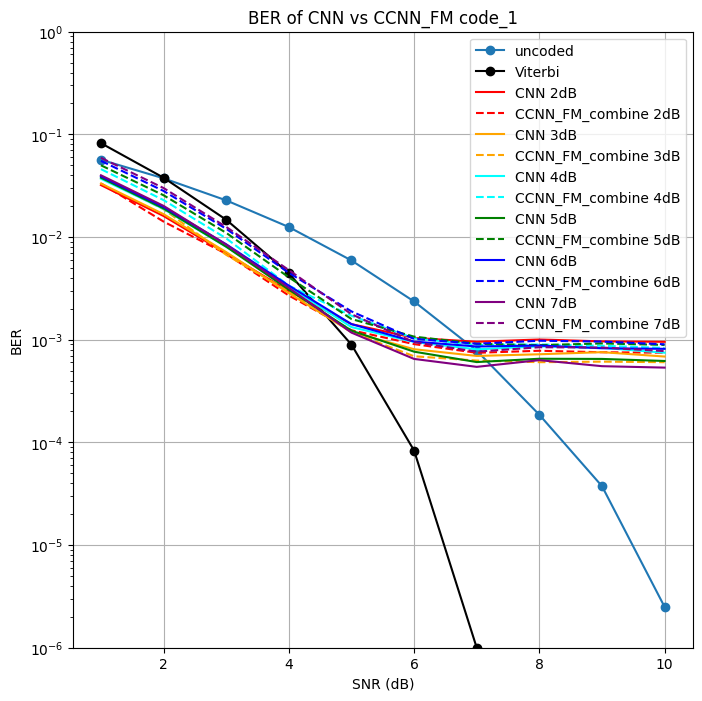

CNN 2dB: [0.0337449983, 0.0163258333, 0.0066908333, 0.002145, 0.0007058333, 0.0002491667, 0.0001591667, 0.0001566667, 0.0001191667, 0.0001541667]
CCNN_FM 2dB: [0.0298866667, 0.0128849996, 0.0054516667, 0.0016958333, 0.0004808333, 8.83333e-05, 7.5e-06, 0.0, 0.0, 0.0]
['11.43%', '21.08%', '18.52%', '20.94%', '31.88%', '64.55%', '95.29%', '99.36%', '100.0%', '100.0%']
CNN 3dB: [0.0378758349, 0.0183083341, 0.0073633334, 0.0022700001, 0.0006208333, 0.0001125, 3.41667e-05, 1.5e-05, 2e-05, 1.91667e-05]
CCNN_FM 3dB: [0.0389858335, 0.0185783338, 0.0069333334, 0.0022533333, 0.0006266666, 0.0001083333, 1.33333e-05, 0.0, 0.0, 0.0]
['-2.93%', '-1.47%', '5.84%', '0.73%', '-0.94%', '3.7%', '60.98%', '93.33%', '100.0%', '100.0%']
CNN 4dB: [0.0418200009, 0.0203283336, 0.008310833, 0.0026216668, 0.0007041667, 0.0001491667, 5.66667e-05, 4.75e-05, 3.66667e-05, 4.83333e-05]
CCNN_FM 4dB: [0.0415150002, 0.0201824997, 0.0081241671, 0.0022825, 0.0006358333, 0.0001158333, 8.3333e-06, 0.0, 0.0, 0.0]
['0.73%', '0

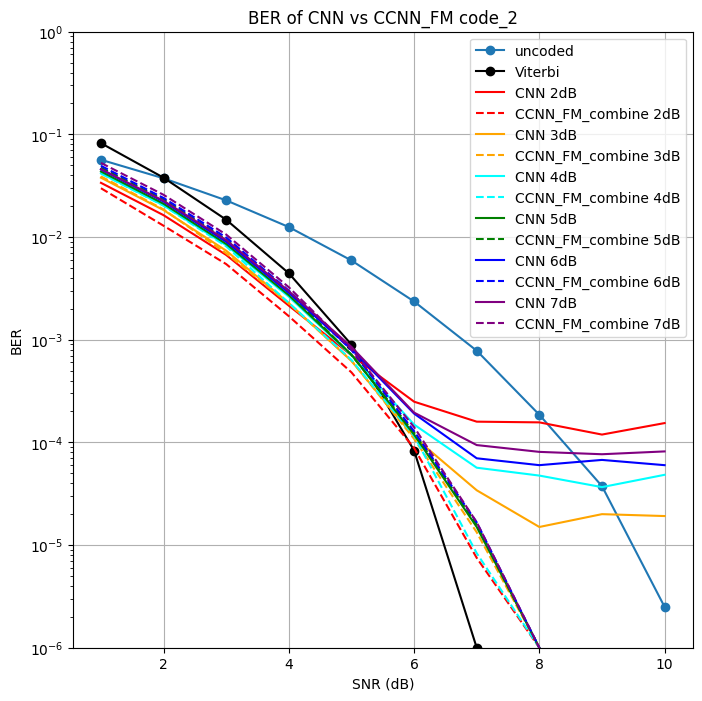

CNN 2dB: [0.034389168, 0.0173591673, 0.0073808334, 0.0029541666, 0.0013266667, 0.0009225, 0.0007683333, 0.0008, 0.0007883334, 0.00075]
CCNN_FM 2dB: [0.0343258344, 0.0154024996, 0.0074074999, 0.0030066667, 0.0012166667, 0.00093, 0.0007375, 0.0008541667, 0.0007925, 0.0007475]
['0.18%', '11.27%', '-0.36%', '-1.78%', '8.29%', '-0.81%', '4.01%', '-6.77%', '-0.53%', '0.33%']
CNN 3dB: [0.0363333337, 0.0181041658, 0.0076333331, 0.003055, 0.0012825, 0.000905, 0.0007341666, 0.0007991667, 0.0007158333, 0.0007458333]
CCNN_FM 3dB: [0.0407208316, 0.0206499994, 0.0080141667, 0.0035133334, 0.0015441667, 0.0010258333, 0.0009025, 0.0010016666, 0.0009425, 0.0009125]
['-12.08%', '-14.06%', '-4.99%', '-15.0%', '-20.4%', '-13.35%', '-22.93%', '-25.34%', '-31.66%', '-22.35%']
CNN 4dB: [0.0404075012, 0.0201458335, 0.0085158329, 0.0031699999, 0.001235, 0.00074, 0.0005641667, 0.0006091667, 0.0006275, 0.00058]
CCNN_FM 4dB: [0.048785001, 0.0244674999, 0.0103799999, 0.0032025001, 0.0013, 0.0006408333, 0.0005358334

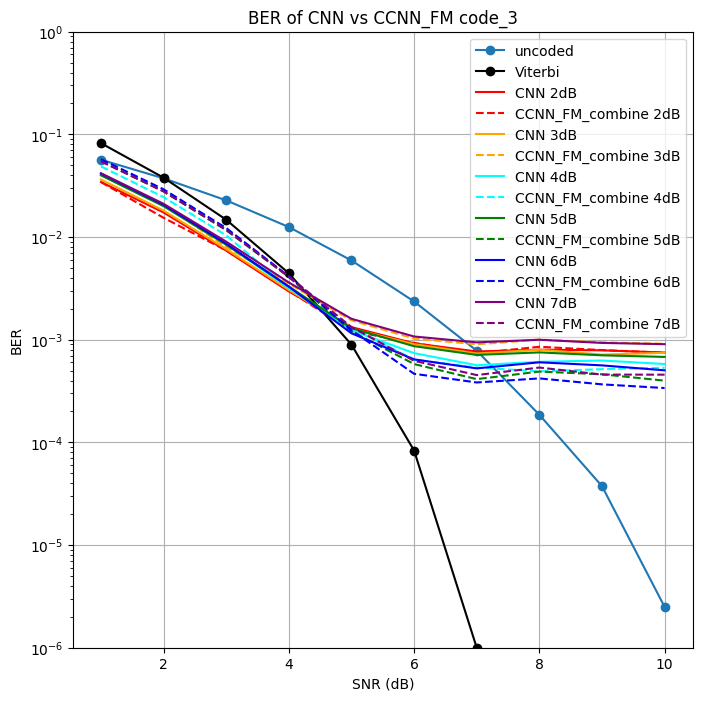

CNN 2dB: [0.0311883334, 0.0151450001, 0.0064216666, 0.0020508333, 0.0006616667, 0.0002975, 0.0001958333, 0.0002, 0.0001733333, 0.0001991667]
CCNN_FM 2dB: [0.0316716656, 0.0139733329, 0.0061116666, 0.0018366666, 0.0005158333, 0.0001358333, 4.33333e-05, 2.91667e-05, 1.5e-05, 1.41667e-05]
['-1.55%', '7.74%', '4.83%', '10.44%', '22.04%', '54.34%', '77.87%', '85.42%', '91.35%', '92.89%']
CNN 3dB: [0.0337533318, 0.0168808326, 0.0069508334, 0.0022383332, 0.0006483333, 0.0002408333, 0.0001775, 0.0001408333, 0.0001408333, 0.0001483333]
CCNN_FM 3dB: [0.0363791659, 0.0181441661, 0.0068416665, 0.00214, 0.0006208333, 0.0001266667, 1.75e-05, 0.0, 0.0, 0.0]
['-7.78%', '-7.48%', '1.57%', '4.39%', '4.24%', '47.4%', '90.14%', '99.29%', '100.0%', '100.0%']
CNN 4dB: [0.0363058336, 0.0180050004, 0.0073133335, 0.0023741666, 0.0006, 0.0001933333, 7.41667e-05, 6.08333e-05, 7e-05, 6.5e-05]
CCNN_FM 4dB: [0.0382583328, 0.0192433335, 0.0077800001, 0.0022275001, 0.0005658334, 0.0001341667, 2.08333e-05, 0.0, 0.0, 0

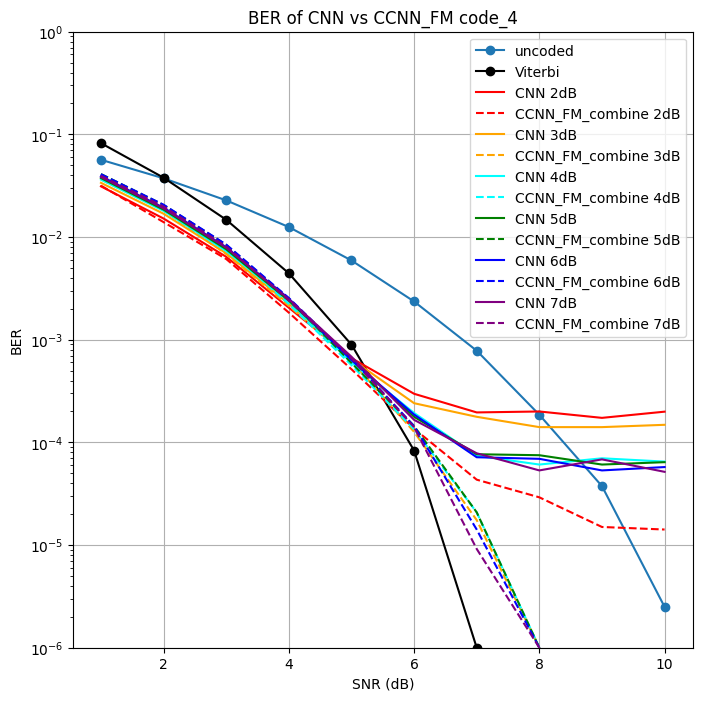

CNN 2dB: [0.0329658315, 0.0162441675, 0.0069341664, 0.0025825, 0.0010075, 0.000635, 0.0005091667, 0.0005441667, 0.00054, 0.0005225]
CCNN_FM 2dB: [0.0324433334, 0.0089125, 0.0066666668, 0.0024041666, 0.0008441667, 0.0005241667, 0.0003941667, 0.0004466667, 0.0003866667, 0.0003558333]
['1.58%', '45.13%', '3.86%', '6.91%', '16.21%', '17.45%', '22.59%', '17.92%', '28.4%', '31.9%']
CNN 3dB: [0.0354041681, 0.0175508335, 0.0073008332, 0.0026891667, 0.0009383333, 0.0004875, 0.0004025, 0.000445, 0.0004091667, 0.0004116667]
CCNN_FM 3dB: [0.0385858342, 0.0189908333, 0.0048416667, 0.0029108333, 0.0009941667, 0.0004841667, 0.0003925, 0.0004341667, 0.0004266667, 0.0003808333]
['-8.99%', '-8.2%', '33.68%', '-8.24%', '-5.95%', '0.68%', '2.48%', '2.43%', '-4.28%', '7.49%']
CNN 4dB: [0.0389058329, 0.0193399992, 0.0081599997, 0.0028241666, 0.0009575, 0.0005066667, 0.0004008333, 0.0004191667, 0.0003691667, 0.0003616667]
CCNN_FM 4dB: [0.0438866653, 0.0218199994, 0.0091199996, 0.0019233333, 0.0010575, 0.0005

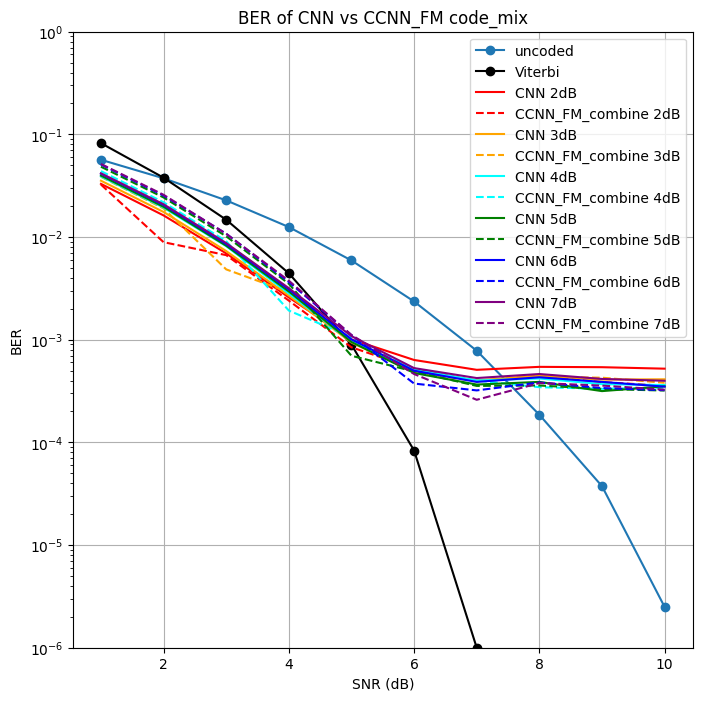

In [51]:
for test_code in code_names:
    utils.draw_BER_compare_combine(result_dir, BERs_uncoded, BERs_hard, 3, 6, test_code, train_range, test_range)

CCNN_FM 2dB: [0.0080666663, 0.0036599999, 0.0013725, 0.000405, 8.41667e-05, 2.5e-05, 4.1667e-06, 0.0, 0.0, 0.0]
CCNN_FM 2dB: [0.033357501, 0.014146667, 0.0068658334, 0.0026941667, 0.0012366667, 0.0009058333, 0.0007458333, 0.0007808333, 0.000755, 0.0007475]
['-313.52%', '-286.52%', '-400.24%', '-565.23%', '-1369.31%', '-3523.33%', '-17799.86%', '-77983.33%', '100%', '100%']
CCNN_FM 3dB: [0.0112133333, 0.0052683335, 0.0020391666, 0.0006325, 0.0001366667, 3.83333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0379575007, 0.0186858326, 0.0067083333, 0.0029575001, 0.0011816666, 0.00069, 0.0006266666, 0.0006041666, 0.0006116666, 0.0006041666]
['-238.5%', '-254.68%', '-228.97%', '-367.59%', '-764.63%', '-1700.0%', '-18700.19%', '-60316.66%', '100%', '100%']
CCNN_FM 4dB: [0.0154883331, 0.0073925001, 0.0028616667, 0.0009608333, 0.00022, 3.83333e-05, 5.8333e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0458791666, 0.0228933338, 0.0097133331, 0.0033641667, 0.0017116667, 0.0010333334, 0.0008883333, 0.00089

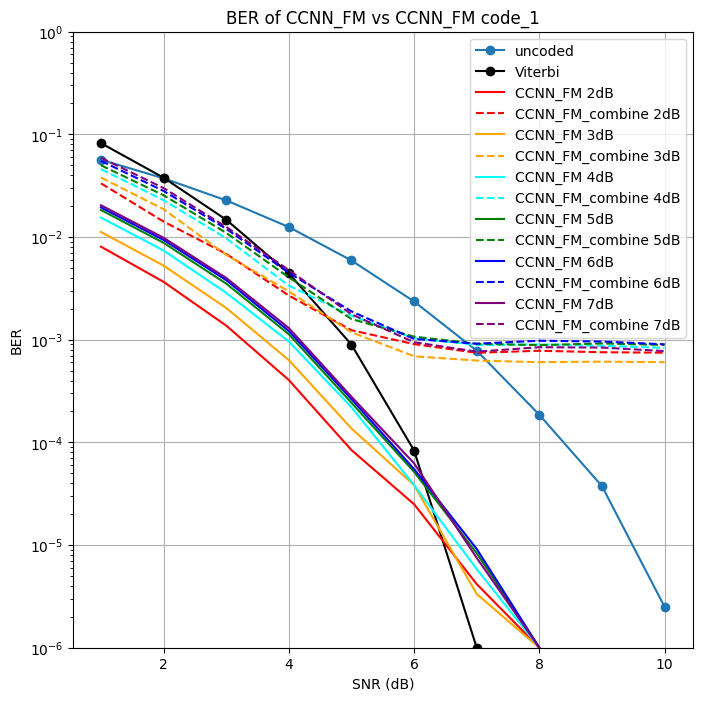

CCNN_FM 2dB: [0.0188266672, 0.0085774995, 0.0033475, 0.0010691667, 0.0002725, 5.16667e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 2dB: [0.0298866667, 0.0128849996, 0.0054516667, 0.0016958333, 0.0004808333, 8.83333e-05, 7.5e-06, 0.0, 0.0, 0.0]
['-58.75%', '-50.22%', '-62.86%', '-58.61%', '-76.45%', '-70.97%', '0.0%', '0.0%', '100%', '100%']
CCNN_FM 3dB: [0.0241800006, 0.011354167, 0.0045949998, 0.0014016667, 0.0003608333, 7.75e-05, 5.8333e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0389858335, 0.0185783338, 0.0069333334, 0.0022533333, 0.0006266666, 0.0001083333, 1.33333e-05, 0.0, 0.0, 0.0]
['-61.23%', '-63.63%', '-50.89%', '-60.76%', '-73.67%', '-39.78%', '-128.57%', '0.0%', '100%', '100%']
CCNN_FM 4dB: [0.0265508331, 0.0125000002, 0.0050674998, 0.0015733333, 0.000375, 8.41667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0415150002, 0.0201824997, 0.0081241671, 0.0022825, 0.0006358333, 0.0001158333, 8.3333e-06, 0.0, 0.0, 0.0]
['-56.36%', '-61.46%', '-60.32%', '-45.07%', '-69.56%', '-37.62%', '0.0%',

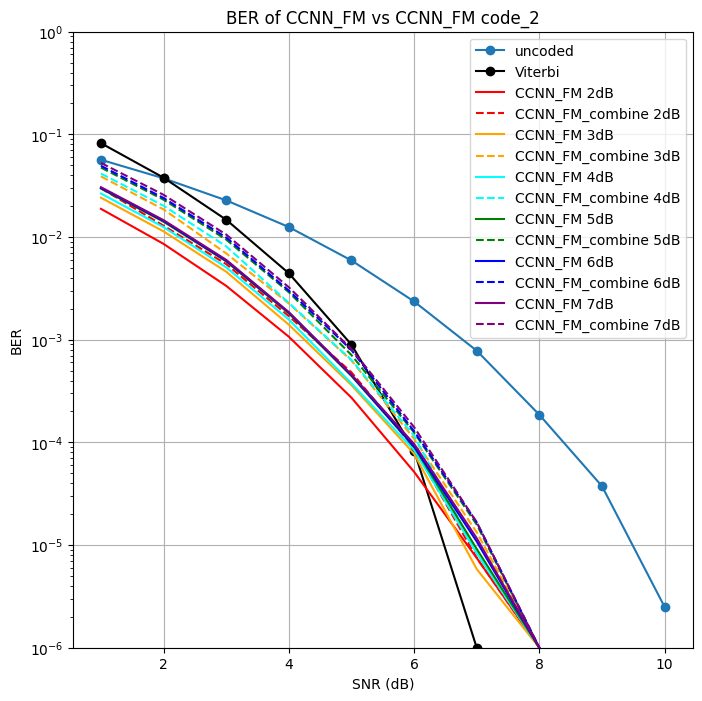

CCNN_FM 2dB: [0.0142683331, 0.0066791666, 0.0025991667, 0.0008283333, 0.00019, 5.33333e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 2dB: [0.0343258344, 0.0154024996, 0.0074074999, 0.0030066667, 0.0012166667, 0.00093, 0.0007375, 0.0008541667, 0.0007925, 0.0007475]
['-140.57%', '-130.61%', '-185.0%', '-262.98%', '-540.35%', '-1643.75%', '-22025.22%', '-85316.67%', '100%', '100%']
CCNN_FM 3dB: [0.0173141658, 0.0080575002, 0.0032316667, 0.0010058334, 0.0002425, 6.08333e-05, 6.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0407208316, 0.0206499994, 0.0080141667, 0.0035133334, 0.0015441667, 0.0010258333, 0.0009025, 0.0010016666, 0.0009425, 0.0009125]
['-135.19%', '-156.28%', '-147.99%', '-249.3%', '-536.77%', '-1586.3%', '-13437.43%', '-100066.66%', '100%', '100%']
CCNN_FM 4dB: [0.0214741658, 0.0102824997, 0.0041491669, 0.0013033333, 0.0003125, 7.16667e-05, 8.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.048785001, 0.0244674999, 0.0103799999, 0.0032025001, 0.0013, 0.0006408333, 0.0005358334, 0.0004916667, 0

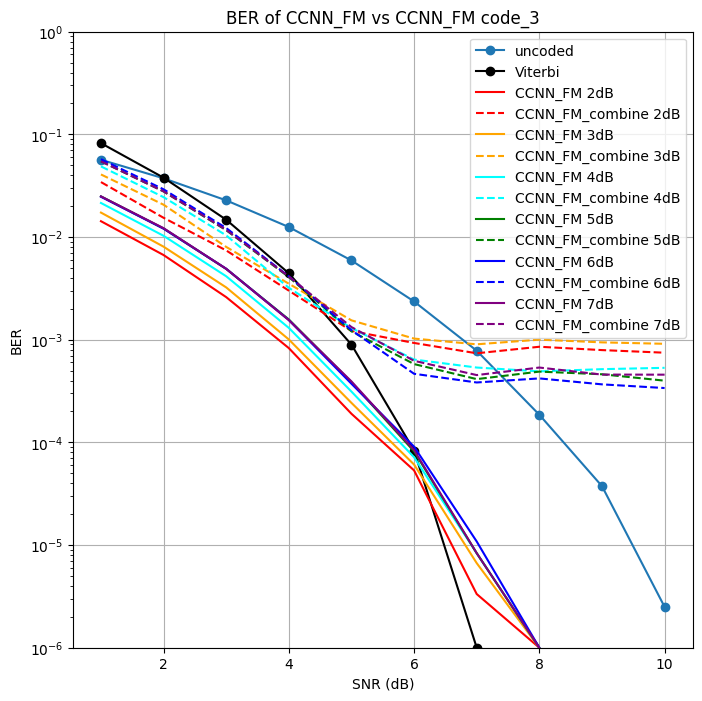

CCNN_FM 2dB: [0.0166683327, 0.0077008335, 0.0030350001, 0.0009558334, 0.0002483333, 5.33333e-05, 1.6667e-06, 0.0, 0.0, 0.0]
CCNN_FM 2dB: [0.0316716656, 0.0139733329, 0.0061116666, 0.0018366666, 0.0005158333, 0.0001358333, 4.33333e-05, 2.91667e-05, 1.5e-05, 1.41667e-05]
['-90.01%', '-81.45%', '-101.37%', '-92.15%', '-107.72%', '-154.69%', '-2499.95%', '-2816.67%', '100%', '100%']
CCNN_FM 3dB: [0.020471666, 0.0099083334, 0.0039258334, 0.0012325, 0.0003166667, 7e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0363791659, 0.0181441661, 0.0068416665, 0.00214, 0.0006208333, 0.0001266667, 1.75e-05, 0.0, 0.0, 0.0]
['-77.7%', '-83.12%', '-74.27%', '-73.63%', '-96.05%', '-80.95%', '-133.33%', '0.0%', '100%', '100%']
CCNN_FM 4dB: [0.0219800007, 0.010675, 0.0043199998, 0.0013641666, 0.0003225, 7.75e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0382583328, 0.0192433335, 0.0077800001, 0.0022275001, 0.0005658334, 0.0001341667, 2.08333e-05, 0.0, 0.0, 0.0]
['-74.06%', '-80.27%', '-80.09%', '-63.29%', '-75.45

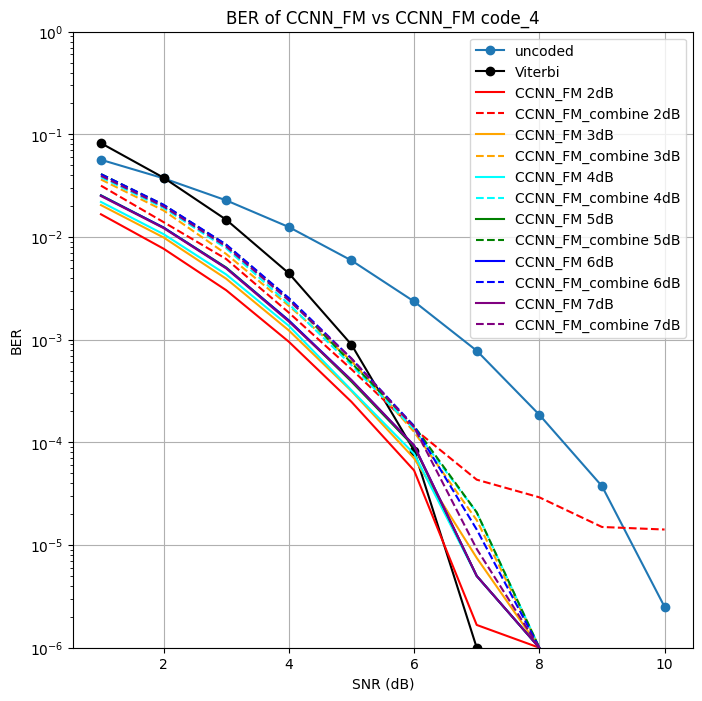

CCNN_FM 2dB: [0.0144499997, 0.0066383332, 0.0026108334, 0.00082, 0.0001783333, 4.75e-05, 3.3333e-06, 0.0, 0.0, 0.0]
CCNN_FM 2dB: [0.0324433334, 0.0089125, 0.0066666668, 0.0024041666, 0.0008441667, 0.0005241667, 0.0003941667, 0.0004466667, 0.0003866667, 0.0003558333]
['-124.52%', '-34.26%', '-155.35%', '-193.19%', '-373.36%', '-1003.51%', '-11725.12%', '-44566.67%', '100%', '100%']
CCNN_FM 3dB: [0.0182416663, 0.0086091664, 0.0034691666, 0.0010758333, 0.000245, 5.91667e-05, 7.5e-06, 0.0, 0.0, 0.0]
CCNN_FM 3dB: [0.0385858342, 0.0189908333, 0.0048416667, 0.0029108333, 0.0009941667, 0.0004841667, 0.0003925, 0.0004341667, 0.0004266667, 0.0003808333]
['-111.53%', '-120.59%', '-39.56%', '-170.57%', '-305.78%', '-718.31%', '-5133.33%', '-43316.67%', '100%', '100%']
CCNN_FM 4dB: [0.0212999992, 0.0102474997, 0.0041341665, 0.001335, 0.0002941667, 6.33333e-05, 5e-06, 0.0, 0.0, 0.0]
CCNN_FM 4dB: [0.0438866653, 0.0218199994, 0.0091199996, 0.0019233333, 0.0010575, 0.0005108333, 0.0004008333, 0.000345,

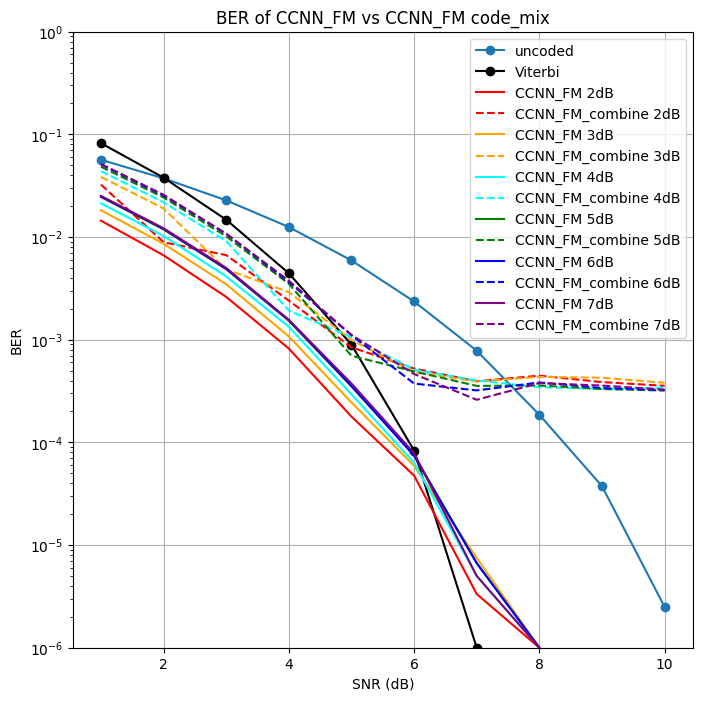

In [52]:
for test_code in code_names:
    utils.draw_BER_compare_combine(result_dir, BERs_uncoded, BERs_hard, 6, 6, test_code, train_range, test_range)